# To what extent do the initial funding round time, the market sector and the geographic location of a company determine the total amount of fundings a startup can secure?

## Project 1

## 1.1 Introduction

As the startup ecosystem continues to flourish, hundreds of new companies are established daily, making venture capital a significant investment category. Both investors and startups are keen to understand the factors that contribute to a startup's future success. Identifying deterministic factors that influence a startup's ability to secure funding is crucial for making informed decisions. Therefore, this project aims to investigate how three factors - initial funding round time, geographic location, and market sector - relate to the amount of funding a startup can secure. The research question is: "To what extent do the initial funding round time, market sector, and geographic location of a company determine the total amount of funding a startup can secure?”

Existing literature has explored various aspects of the startup ecosystem, including the factors that contribute to success or failure. For instance, Gompers et al. (2008) have investigated the impact of public market conditions on venture capital investment activities, providing a broader perspective on external factors influencing startup funding. Hochberg et al. (2007) examined the importance of social networks and relationships in venture capital investments, highlighting the potential influence of geographic location on the strength of venture capital networks and funding opportunities for startups. Puri and Zarutskie (2012) compared the growth, financing, and exit outcomes of venture-capital-financed firms and non-venture-capital-financed firms, offering insights into how different financing sources might affect startup performance and their ability to secure funding.

While these studies have contributed valuable insights into the startup ecosystem, they have not specifically addressed the combined effects of initial funding round time, market sector, and geographic location on the total amount of funding a startup can secure. This project is of novelty as it addresses the gap in the literature by incorporating three different independent variables while also analyzing the dependent variable (funding) based on subgroups. This approach sets it apart from previous studies, offering a more holistic understanding of the factors influencing startup funding. The methodology used in this project will combine statistical analyses, such as OLS regression and regression trees, and graphical analyses, with visualizations including bar charts, histograms, pie charts, and maps. 

The dataset used in this project is obtained from the publicly available source, Kaggle. Among all the datasets related to the startup ecosystem, the funding rounds, funds, investments, objects, and offices are chosen, as these will provide data relevant to the factors stated in the research question. Additionally, a dataset of cities and their corresponding latitude and longitude coordinates is obtained from the GeoNames database to create maps. Overall, this project aims to fill the research gap by providing a comprehensive analysis that can better inform investors and startups in making more informed decisions in real-life situations.

### 1.1.1 Variables

The three independent variables chosen are the time, market sector of the company and the geographic location of the company by country. Specifically, the time variable indicates the month in which the initial funding round took place.The market sector and geographic location are categorical variables.The dependent variable chosen is the amount of fundings that a startup can secure, which is a continuous variable.

These independent variables are chosen as they are commonly considered to be influential factors in the funding process for startups. The levels of interest among people differ for companies in different sectors. Thus, the market sector that a particular company stays in can impact the amount of funding a startup can secure. The location differs based on the overall state of the economy, which may influence the availability of funding sources.The time when the initial funding round took place may reflect the fluctuations in the overall economy, investment trends, competition in the market, etc., which can all be contributing factors to the total amount of funding that a startup can secure.

These variables are strongly related to the research question, since the three factors are thought to be having an effect on the amount of funding that can be raised. By investigating the relationship between the explanatory variables and the total amount of funding, we can gain insight into which factors are the most dominating in determining the amount of fundings a startup can secure.

Additionally, the outcome variable, the total amount of fundings that startups can secure, will also be analyzed through the status of firms. The status of the firm can give insight into how successful the company has been in securing funding. The successfulness of the startups can mostly be reflected on the outcome variable. The total amount of fundings and the startups status are interrelated and is also worth investigating.

The variables are critical to the analysis, as they allow for quantifying the potential relationship between them. The results can possibly be used to develop a predictive model that help investors and startups make informed decisions about funding and provide support for startups in need of investments and fundings. Also, by knowing and understanding the key drivers of funding, we can also identify areas for improvement during the funding process, which is all quite useful in real-world situations.

## 1.2 Data Cleaning / Loading

In [80]:
%%capture
# Import Packages
! pip install qeds
import qeds
import numpy as np
import pandas as pd
# Importing for Data Visualisation
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns

In [81]:
%%capture
# Import datasets from local repository
# Dataset 1: investments
investments = pd.read_csv(r"\Users\user\Desktop\ECO225\ECO225Project\Data\investments.csv", sep = ",")
# Dataset 2: objects
objects = pd.read_csv(r"C:\Users\user\Desktop\ECO225\ECO225Project\Data\objects.csv", sep = ",")

In [3]:
# Rename "id" in objects.csv to "funded_object_id" (for merging afterwards)
objects.rename(columns = {"id": "funded_object_id"}, inplace = True)

In [4]:
# dropping the unnecessary information
objects.drop(["permalink", "founded_at", "closed_at",  "created_by", "created_at", "updated_at", "domain", "homepage_url", \
              "twitter_username", "logo_url", "logo_width","description", "first_investment_at", "last_investment_at", "investment_rounds", \
              "logo_height", "short_description", "overview", "tag_list", "normalized_name", "entity_id", "parent_id", "relationships",\
             "state_code", "region", "invested_companies", "last_funding_at", "funding_rounds", "first_milestone_at",\
              "last_milestone_at", "milestones"], axis = "columns", inplace = True)

In [5]:
# Import datasets from local repository
# Dataset 3: funding_rounds
funding_rounds = pd.read_csv(r"\Users\user\Desktop\ECO225\ECO225Project\Data\funding_rounds.csv", sep = ",")
# Dataset 4: funds
funds = pd.read_csv(r"\Users\user\Desktop\ECO225\ECO225Project\Data\funds.csv", sep = ",")
# Dataset 5: offices
offices = pd.read_csv(r"\Users\user\Desktop\ECO225\ECO225Project\Data\offices.csv", sep = ",")

In [6]:
# dropping the unnecessary information
# Dataset 3: funding_rounds
funding_rounds.drop(["funding_round_id", "funded_at", "funding_round_type", "funding_round_code", "raised_amount", "raised_currency_code", \
                     "pre_money_valuation_usd", "pre_money_valuation", "pre_money_currency_code", "post_money_valuation_usd", "participants",\
                     "post_money_valuation", "post_money_currency_code", "is_first_round", "is_last_round", "source_url", "created_by", \
                     "source_description", "created_at", "updated_at"], axis = 1, inplace = True)

In [7]:
# dropping the unnecessary information
# Dataset 4: funds
funds.drop(["fund_id", "funded_at", "raised_currency_code", "source_url", "source_description", "created_at", "updated_at"], axis = 1,\
           inplace = True)

In [8]:
# dropping the unnecessary information
# Dataset 5: offices
offices.drop(["office_id", "description", "region", "address1", "address2", "zip_code", "state_code", "latitude", "longitude", \
              "created_at", "updated_at"], axis = 1, inplace = True)

In [9]:
# Rename "object_id" in funding_rounds.csv, funds.csv, offices.csv to "funded_object_id" (for merging afterwards)
funding_rounds.rename(columns = {"object_id": "funded_object_id"}, inplace = True)
funds.rename(columns = {"object_id": "funded_object_id"}, inplace = True)
offices.rename(columns = {"object_id": "funded_object_id"}, inplace = True)
# Rename "raised_amount_usd" in funding_rounds.csv and "raised_amount" in funds.csv to "funding_total_usd" (for merging afterwards)
funding_rounds.rename(columns = {"raised_amount_usd": "funding_total_usd"}, inplace = True)
funds.rename(columns = {"raised_amount": "funding_total_usd"}, inplace = True)

In [10]:
# changing csv to data frame format
df_investments = pd.DataFrame(investments)
df_objects = pd.DataFrame(objects)
df_funding_rounds = pd.DataFrame(funding_rounds)
df_funds = pd.DataFrame(funds)
df_offices = pd.DataFrame(offices)
# merging the investments and objects data frames
df_merged_1 = pd.merge(df_investments, df_objects, on = "funded_object_id")

In [11]:
# merging the funding_rounds data frame with df_merged_1
df_merged_2 = pd.merge(df_funding_rounds, df_merged_1, on = ["funded_object_id", "funding_total_usd"])

In [12]:
# merging the funds data frame with df_merged_2
df_merged_3 = pd.merge(df_funds, df_merged_2, on = ["funded_object_id", "funding_total_usd"], how = "right")

In [13]:
# removing duplicates in the merged data frame
df_merged_3 = df_merged_3.drop_duplicates()

In [82]:
%%capture
# merging the offices data frame with df_merged_3
df_merged_final = pd.merge(df_offices, df_merged_3, on = ["funded_object_id", "country_code"], how = "right")
# removing duplicates in the merged data frame
df_merged_final = df_merged_final.drop_duplicates()
# dropping the unncessary columns
df_merged_final.drop(["id_x", "id_y", "funding_round_id", "investor_object_id", "created_at", "updated_at"], axis = 1, inplace = True)

In [15]:
# Goal: avoiding suffixes in the name_x and name_y column
# resetting index of the name_x and name_y columns
df_merged_final["name_x"] = df_merged_final["name_x"].reset_index(drop=True)
df_merged_final["name_y"] = df_merged_final["name_y"].reset_index(drop=True)

# dropping duplicates in the name_x and name_y columns
df_merged_final.drop_duplicates(subset=["name_x", "name_y"], inplace=True)

# concatenating the name_x and name_y columns and resetting index to avoid duplicate labels
df_merged_final["name"] = pd.concat([df_merged_final["name_x"], df_merged_final["name_y"]]).reset_index(drop=True)
df_merged_final["name"].drop_duplicates(inplace=True)

# dropping the name_x and name_y columns
df_merged_final.drop(["name_x", "name_y"], axis=1, inplace=True)

In [16]:
# check whether any columns has missing values. if true, drop that row
# (the columns other than "country_code", "funding_total_usd", "category_code", and "first_funding_at" don't have to be dropped even if having
# a boolean value of True, as they won't affect further analysis)
df_merged_final.isnull().any(axis=0)

funded_object_id     False
city_x                True
country_code          True
funding_total_usd    False
entity_type          False
category_code         True
status               False
city_y                True
first_funding_at      True
name                  True
dtype: bool

In [17]:
# dropping all rows with missing values
df_merged_final.dropna(subset=["country_code", "category_code", "first_funding_at"], inplace=True)
df_merged_final.drop(columns=['city_y'], inplace=True)
# extracting only the month as discrete data from the "first_funding_at" column
# Convert the "first_funding_at"column to a datetime object
df_merged_final["first_funding_at"] = pd.to_datetime(df_merged_final["first_funding_at"])
# Extract the month from the datetime object
df_merged_final["month"] = df_merged_final["first_funding_at"].dt.month.astype(int)
df_merged_final
# renaming the data frame columns
df_new = df_merged_final.rename(columns={"country_code": "country", 
                                          "funding_total_usd": "total amount of funding (USD)", 
                                          "category_code": "market sector", 
                                        "funded_object_id": "funded object id", 
                                        "entity_type": "entity type",
                                        "city_x": "city", 
                                        "first_funding_at": "first funding at"})
df_new  # The final data frame after finishing data cleaning

funded object id       city country  total amount of funding (USD)  \
0                 c:26     London     GBR                     13200000.0   
1                 c:23   New York     USA                     45000000.0   
4                 c:43     Austin     USA                      1000000.0   
6                 c:65  Ramat Gan     ISR                      3000000.0   
7                 c:72    Fremont     USA                      4000000.0   
...                ...        ...     ...                            ...   
32015         c:286125    Seattle     USA                      4350000.0   
32019          c:60389    Cologne     DEU                            0.0   
32020         c:286178  San Diego     USA                     17000000.0   
32023         c:286183        NaN     USA                       225000.0   
32027         c:211890    Toronto     CAN                      3000000.0   

      entity type market sector     status first funding at name  month  
0         Company   games_video     closed       2005-06-01  NaN      6  
1         Company   games_video   acquired       2007-05-09  NaN      5  
4         Company           web     closed       2007-06-01  NaN      6  
6         Company   games_video   acquired       2007-01-01  NaN      1  
7         Company        mobile   acquired       2006-01-01  NaN      1  
...           ...           ...        ...              ...  ...    ...  
32015     Company     education  operating       2013-12-12  NaN     12  
32019     Company     cleantech  operating       2013-07-10  NaN      7  
32020     Company       biotech  operating       2013-12-12  NaN     12  
32023     Company           web  operating       2013-12-12  NaN     12  
32027     Company           web  operating       2013-12-12  NaN     12  

[11526 rows x 10 columns]

## 1.3 Summary Statistics Tables

In [18]:
# summary statistics for the X variables (geographic location & market sector of the companies) and 
# Y variable (total amount of funding in USD)
stats = df_new.drop('funded object id', axis=1).describe(include=["object", "float"])

# Convert and format the 'total amount of funding' column in millions $
stats.loc[stats.index[4]:, 'total amount of funding (USD)'] = stats.loc[stats.index[4]:, 'total amount of funding (USD)'].apply(lambda x: f'{x/1000000:.2f}')

stats = stats.rename(columns={"total amount of funding (USD)": "total amount of funding (USD MM)"})
stats

city country total amount of funding (USD MM) entity type  \
count           10974   11526                          11526.0       11526   
unique           2551      96                              NaN           1   
top     San Francisco     USA                              NaN     Company   
freq              761    6102                              NaN       11526   
mean              NaN     NaN                             7.21         NaN   
std               NaN     NaN                            37.88         NaN   
min               NaN     NaN                             0.00         NaN   
25%               NaN     NaN                             0.04         NaN   
50%               NaN     NaN                             1.15         NaN   
75%               NaN     NaN                             5.23         NaN   
max               NaN     NaN                          2600.00         NaN   

       market sector     status      name  
count          11526      11526      4929  
unique            42          4      4929  
top         software  operating  Babelgum  
freq            1969       9565         1  
mean             NaN        NaN       NaN  
std              NaN        NaN       NaN  
min              NaN        NaN       NaN  
25%              NaN        NaN       NaN  
50%              NaN        NaN       NaN  
75%              NaN        NaN       NaN  
max              NaN        NaN       NaN

In [19]:
# summary statistics for X variable: initial funding round time (shown in a separate table as summary statistics needed for it are different)
# Convert value counts output to a dataframe and rename columns
month_counts = pd.DataFrame(df_new["month"].value_counts()).reset_index().rename(columns={"index": "Month", "month": "Count"})
month_counts

Month  Count
0       1   1505
1       9   1033
2       6   1032
3       8    997
4      10    959
5       3    935
6       7    927
7      11    901
8       5    882
9       4    855
10      2    773
11     12    727

In [20]:
# Interquartile Range
# Calculate the 25th and 75th percentiles
Q1 = df_merged_final["funding_total_usd"].quantile(0.25)
Q3 = df_merged_final["funding_total_usd"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1
print(IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df_merged_final[(df_merged_final["funding_total_usd"] < lower_bound) | (df_merged_final["funding_total_usd"] > upper_bound)]
# Number of outliers
num_outliers = len(outliers)
print(num_outliers)

5187500.0
1288


### 1.3.1 Summary Statistics Interpretation

Overall, there are 11526 data in the final merged data frame. Based on the summary statistics on the "country", it is shown that among the 11526 startups, most of them have their headquarter offices located in USA, with the highest frequency of 6102. The summary statistics on the "market sector" show that most of the startups are positioned in the software sector, with the highest frequency of 1969.The summary statistics for "month" show that most of the initial funding round time are in January, September and June, which are the top 3 in frequencies among the 12 months. Looking at the summary statistics of the total amount of fundings, it can be seen that the range (260 million) is really large. By comparing the mean to the median, a larger mean indicates that the distribution of the amount of fundings is skewed to the right. This means that most of the data are more towards the lower side of the distribution, with few data that are high in the value pulling up the mean. It can be interpreted as most of the startups have a low to average funding amount, with few startups securing a relatively large amount of funding amount. The standard deviation is greater than the mean, meaning that outliers exist among the 11526 data, which may have to be dropped for further analysis. The IQR justifies the existence of outliers. 1288 data can be considered as outliers. For example, the minimum which indicates a startup securing no fundings.

## 1.4 Plots, Histograms, Figures

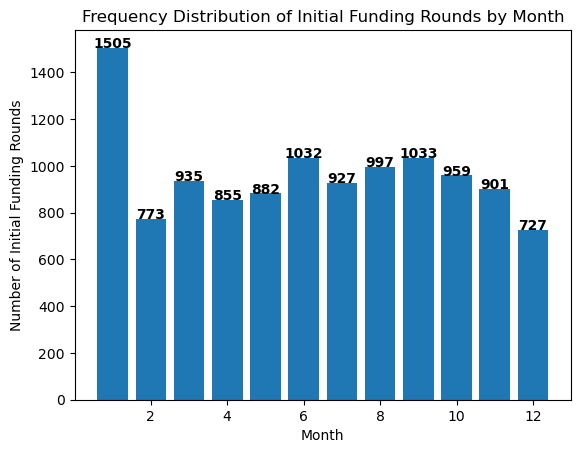

In [21]:
# X variable 1: initial funding round time
# Frequency distribution of the initial funding round time (in month)
# Group data by month
df_grouped = df_merged_final.groupby(df_merged_final['month']).count()

plt.bar(df_grouped.index, df_grouped['funding_total_usd'])
plt.xlabel("Month")
plt.ylabel("Number of Initial Funding Rounds")
plt.title("Frequency Distribution of Initial Funding Rounds by Month")

# Add count labels on the bars
for i, v in enumerate(df_grouped['funding_total_usd']):
    plt.text(i+1.0, v+0.5, str(v), color='black', fontweight='bold', ha='center')

plt.show()

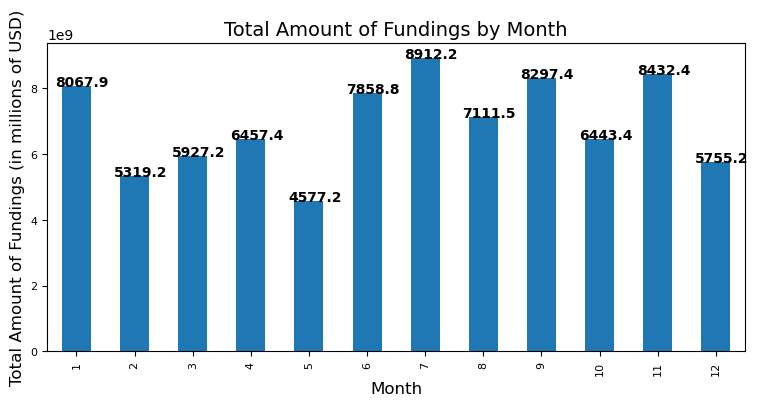

In [22]:
# X variable 1: initial funding round time
# Plotting a bar graph showing the total amount of fundings raised in each month
# Group data by month and calculate total funding
df_grouped = df_merged_final.groupby("month").sum()["funding_total_usd"]

ax = df_grouped.plot(kind = "bar", figsize = (9, 4))
ax.set_xlabel("Month", fontsize = 12)
ax.set_ylabel("Total Amount of Fundings (in millions of USD)", fontsize = 12)
ax.set_title("Total Amount of Fundings by Month", fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize = 8)

for i, v in enumerate(df_grouped):
    plt.text(i+0.1, v+0.5, "{:.1f}".format(v/1000000), color='black', fontweight='bold', ha='center')

plt.show()

The frequency distribution graph indicates that January has the highest number of fundings, significantly surpassing the other months. This pattern may be attributed to the January effect, as some investors consider January the best month to start a new investment program.

However, despite having the highest funding numbers, January does not necessarily generate the most funding. In fact, the month that raises the most funding is July, according to the bar plot of total funding amounts by month. This phenomenon may not always hold true, as it can be influenced by the general economic situation. Startups conducting their initial funding round during an economic upswing are more likely to raise a substantial amount of funding.

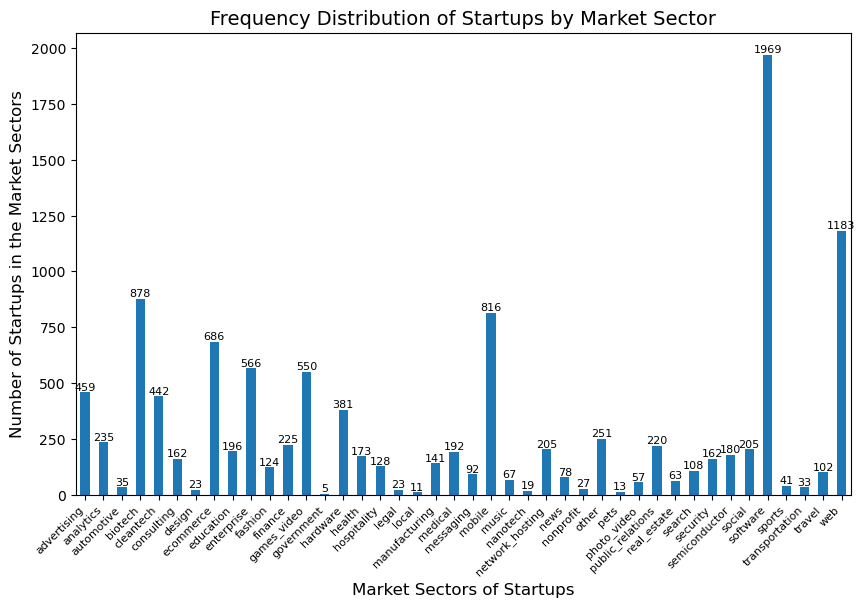

In [23]:
# X variable 2: Market Sector of the Company
# Frequency distribution of the startups for different market sectors (All)
df_agg = df_merged_final.groupby('category_code')['category_code'].count().reset_index(name = 'count')

# Plot the bar chart with count labels
ax = df_agg.plot(kind = 'bar', x = 'category_code', y = 'count', figsize=(10,6), legend = None)
plt.xlabel("Market Sectors of Startups", fontsize = 12)
plt.ylabel("Number of Startups in the Market Sectors", fontsize = 12)
plt.title("Frequency Distribution of Startups by Market Sector", fontsize = 14)
plt.xticks(rotation = 45, ha = 'right', fontsize = 8)

# Add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 8)
    
plt.show()

The software, web, and biotech sectors are the top three most popular sectors in startups funding. The software sector dominates the others, with 1969 startups in this sector, exceeding the web sector, which ranks second, by 786 startups (6.8%). This suggests that the software industry is a highly competitive and lucrative market for startups.

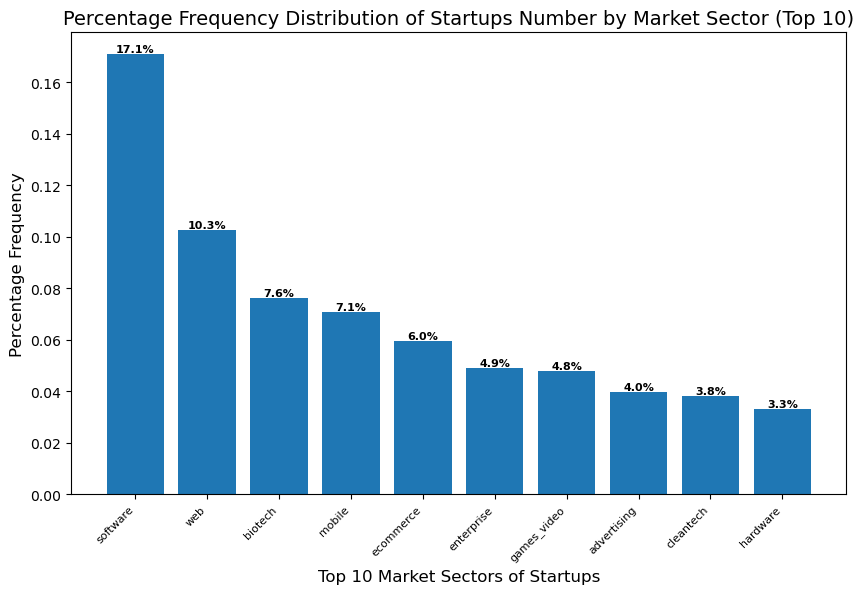

In [24]:
# X variable 2: Market Sector of the Company
# Percentage frequency distribution of the startups for different market sectors (top 10)
# (From highest to lowest)
top_10_sectors = df_merged_final["category_code"].value_counts(normalize=True).nlargest(10)

# Plot the percentage frequency distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_sectors.index, top_10_sectors.values)
plt.xlabel("Top 10 Market Sectors of Startups", fontsize=12)
plt.ylabel("Percentage Frequency", fontsize=12)
plt.title("Percentage Frequency Distribution of Startups Number by Market Sector (Top 10)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add the percentage labels on the top of each bar
for i, v in enumerate(top_10_sectors):
    plt.text(i, v+0.0008, str(round(v*100, 1)) + '%', color = 'black', fontweight = 'bold', fontsize = 8, ha = 'center')
    
plt.show()

In terms of the percentage frequency distribution of startups in each market sector, the top three sectors remain the same: software (17.1%), web (10.3%), and biotech (7.6%). The percentage frequency distribution graph presents the relative frequency of startups number in each market sector among all the startups in the dataset. The calculation of the percentage is done by dividing the number of companies in each sector by the total number of companies in the dataset.While software dominates the other sectors in terms of frequency, the difference between software and the second place, biotech, becomes much smaller in terms of percentage, only a 1.3% difference. This may indicate a significant amount of funding in the startups in the biotech sector as well.

To provide a more comprehensive view of the startups distribution among the market sectors, an additional graph that aggregates the industries at a higher-level based on North American Industry Classification System (NAICS) is created.

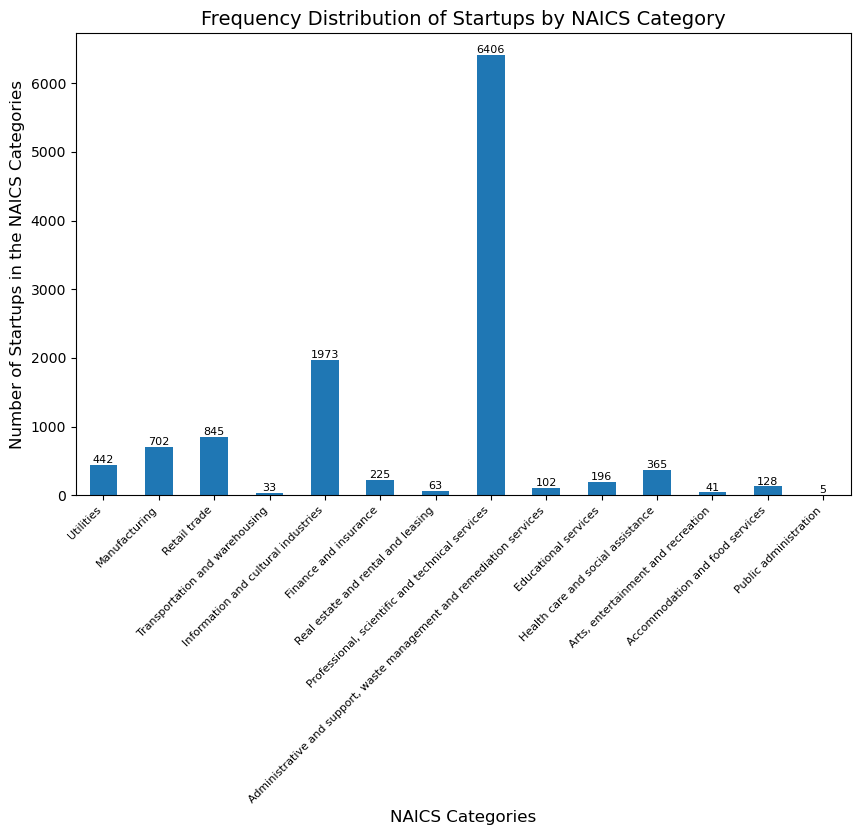

In [25]:
# X variable 2: Market Sector of the Company
# Define a dictionary mapping market sectors to their corresponding NAICS codes
sector_to_naics = {
    'advertising': '54','analytics': '54','automotive': '44-45','biotech': '54','cleantech': '22','consulting': '54',
    'design': '54','ecommerce': '44-45','education': '61','enterprise': '54','fashion': '44-45','finance': '52',
    'games_video': '51','government': '91','hardware': '31-33','health': '62','hospitality': '72','legal': '54',
    'local': '54','manufacturing': '31-33','medical': '62','messaging': '51','mobile': '51','music': '51',
    'nanotech': '54','network_hosting': '51','news': '51','nonprofit': '54','other': '54','pets': '54','photo_video': '51',
    'public_relations': '54','real_estate': '53','search': '51','security': '54','semiconductor': '31-33','social': '54',
    'software': '54','sports': '71','transportation': '48-49','travel': '56','web': '54'
}

# Map market sectors to NAICS categories
df_merged_final['naics'] = df_merged_final['category_code'].map(sector_to_naics)

# Create dictionary mapping NAICS codes to full industry names
naics_to_industry = {
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31-33': 'Manufacturing',
    '41': 'Wholesale trade',
    '44-45': 'Retail trade',
    '48-49': 'Transportation and warehousing',
    '51': 'Information and cultural industries',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support, waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '91': 'Public administration'
}

# Aggregate startups by NAICS category
df_naics_agg = df_merged_final.groupby('naics')['naics'].count().reset_index(name='count')

# Map NAICS codes to full industry names
df_naics_agg['industry'] = df_naics_agg['naics'].map(naics_to_industry)

# Create a dictionary mapping market sector names to their corresponding NAICS code and industry names
legend_dict = {k: (v, naics_to_industry[v]) for k, v in sector_to_naics.items()}

# Plot the bar chart with count labels
ax = df_naics_agg.plot(kind='bar', x='industry', y='count', figsize=(10,6), legend=None)
plt.xlabel("NAICS Categories", fontsize=12)
plt.ylabel("Number of Startups in the NAICS Categories", fontsize=12)
plt.title("Frequency Distribution of Startups by NAICS Category", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)

# Modify x-axis labels to show full names of NAICS categories
ax.set_xticklabels(df_naics_agg['industry'], fontsize=8)

plt.show()

Based on the frequency distribution of startups by the broader NAICS categories, it is revealed that the dominating aggregated industry is "professional, scientific and technical services". According to the definition provided by NAICS, this is the sector that involves activities in which human capital is the primary input, with employees providing their knowledge and skills on an assignment basis(Government of Canada, 2021). Examples of activities in this sector include legal services, accounting services, and consulting services. This highlights the importance of knowledge-based industries in the startup ecosystem.

The "information and cultural industries", which is the sector that primarily engage in producing and distributing the intangible information and cultural products, ranked the second. This sector includes activities such as publishing, broadcasting, and software publishing. It is worth noting that this sector is rapidly growing due to the increasing demand for digital content, especially during the pandemic.

Furthermore, the data shows that the third most common category for startups is "retail trade", which primarily engage in retailing merchandise. It is worth mentioning that in this category, a wide range of businesses can be found, from brick-and-mortar stores to online retailers. These startups often face unique challenges in terms of competition and customer service, but also have the potential for significant growth and profitability. Overall, it is clear that the retail industry remains a key player in the startup landscape, and will likely continue to be so in the years to come.

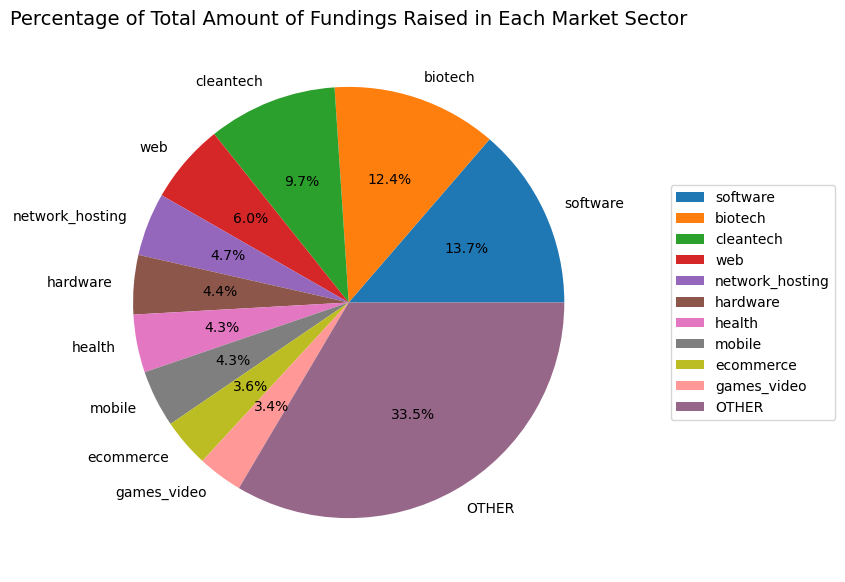

In [26]:
# X variable 2: Market Sector of the Company
# Plotting the pie chart, showing the percentage of total amount of fundings raised in each market sector.
# Calculate the total amount of funding raised in each market sector
df_grouped = df_merged_final.groupby("category_code").sum()["funding_total_usd"]

# Get the top 10 market sectors and combine the rest as "OTHER"
top_sectors = df_grouped.nlargest(10)
other_sectors = pd.Series(df_grouped.sum() - top_sectors.sum(), index=["OTHER"])
# The other sectors include all the market sectors after the top 10. It's all capitalized to distinguish with the "other" market sector.

# Combine the top 10 sectors and "OTHER" into a single dataframe
df_combined = pd.concat([top_sectors, other_sectors])

# Define color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#ff9896', '#976789']

# Plot the pie chart
fig, ax = plt.subplots(figsize=(9, 7))
ax.pie(df_combined.values, labels=df_combined.index, autopct='%1.1f%%', colors = colors)

# Adjust legend placement
ax.legend(df_combined.index, bbox_to_anchor=(1.25, 0.5), loc = "center", fontsize = 10)

ax.set_title("Percentage of Total Amount of Fundings Raised in Each Market Sector", fontsize = 14)
plt.show()

The percentage of total amount of fundings raised in each market sector presented by the pie chart above provides further insights into the performance of each industry.The calculation of the percentage is done by dividing the total amount of funding raised by companies in each sector by the total amount of funding raised by all companies in the dataset. The pie chart shows that the top 3 sectors having the most total fundings raised are the software (13.7%), biotech (12.4%) and cleantech (9.7%). This indicates that these three sectors are highly attractive to investors, as they have raised the most funds. In particular, the software sector stands out with the highest percentage of total fundings raised. While software and biotech are also among the top three sectors in terms of frequency, the third sector, cleantech, appears in the top three of the pie chart, instead of web. This indicates that startups in the cleantech sector raised a significant amount of funding despite having fewer startups than the web sector.

In conclusion, the software sector dominates in terms of the number of startups and total funding raised, while biotech and cleantech sectors also play significant roles in the startup ecosystem. By examining both narrowly categorized market sectors and broader NAICS categories, the analysis provides a comprehensive view of the distribution, funding, and growth potential across various industries.

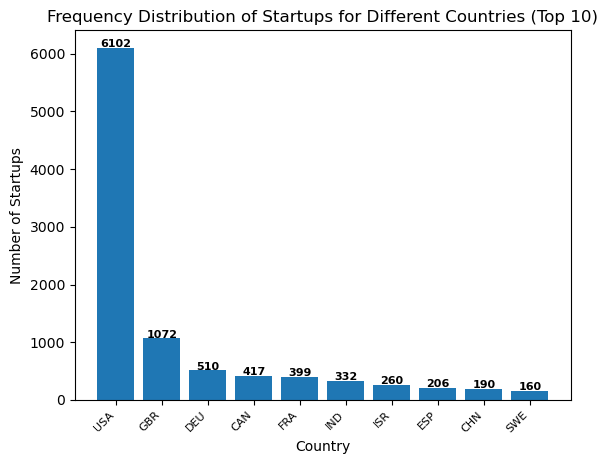

In [27]:
# X variable 3: geographic location
# Plotting a frequency distribution of the startups for top 10 countries
# Count the number of startups for each country
startups_per_country = df_merged_final["country_code"].value_counts()

# Get the top 10 countries
top_10_countries = startups_per_country[:10]

plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Startups")
plt.title("Frequency Distribution of Startups for Different Countries (Top 10)")
plt.xticks(rotation = 45, ha = 'right', fontsize = 8)

for i, v in enumerate(top_10_countries):
    plt.text(i, v + 10, str(v), color = 'black', fontweight = 'bold', fontsize = 8, ha = 'center')

plt.show()

The above graph shows the number of startups in the top 10 countries. The number of startups in USA dominate the others. 

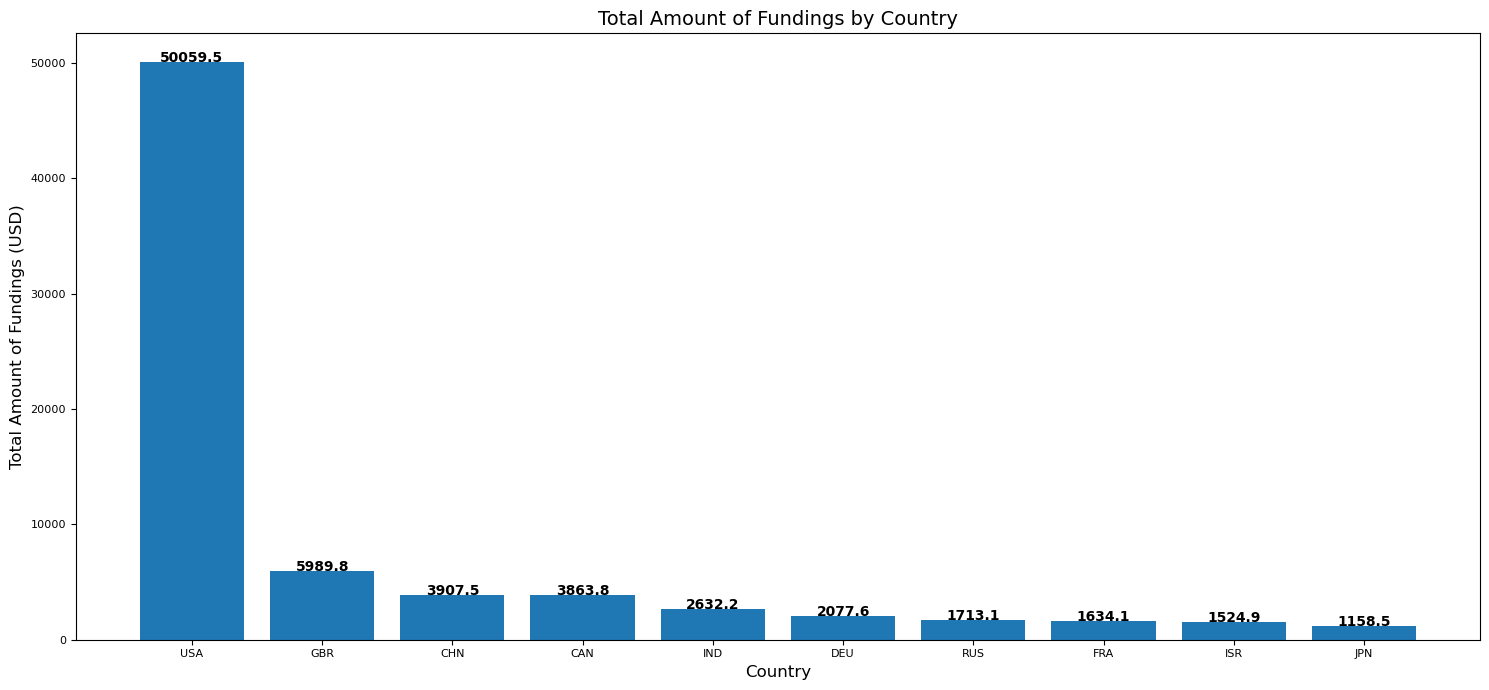

In [28]:
# X variable 3: geographic location
# Plotting a bar plot showing the geographic location (by country) of the companies via total amount of fundings
# Group data by geographic location and calculate total funding
df_grouped = df_merged_final.groupby("country_code").sum()["funding_total_usd"]

# Sort values in descending order
df_grouped = df_grouped.sort_values(ascending=False)

# Select top 10 locations
top_10 = df_grouped[:10]

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(top_10.index, top_10.values / 1e6)
ax.set_xlabel("Country", fontsize = 12)
ax.set_ylabel("Total Amount of Fundings (USD)", fontsize = 12)
ax.set_title("Total Amount of Fundings by Country", fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize = 8)

# Add number labels to the bars
for i, v in enumerate(top_10.values / 1e6):
    ax.text(i, v + 0.8, str(round(v, 1)), color = 'black', fontweight = 'bold', fontsize = 10, ha = 'center')

plt.tight_layout()
plt.show()

The above bar plot shows the total amount of fundings that startups secured in the top 10 countries. It can be seen that startups in USA dominate the others. While this is also due to USA having the dominating frequency in terms of the number of startups. What is interesting with this graph is that China, ranking the third in this bar plot, only ranks at the ninth place in the frequency distribution of startups graph. With a relatively smaller number of startups compared to the other top countries, China raised a significant amount of fundings. 

# Project 2

## 2.1 The Message

The Y variable, total amount of fundings raised by startups, is strongly associated with the status of the firm. The status of the firm is a categorical data, made up of 4 different types: "closed", "operating", "acquired" and "ipo". The meaning of each status is shown as below:
- "closed": failed startup
- "operating": successful / current operating startup
- "acquired": acquired startup (when one company take over the another)
- "ipo": initial public offering (ownership transitioning from private to public)

By examining the relationship between the status of the firm and the total amount of fundings raised, it can be determined how certain statuses are associated with higher or lower funding amounts. This information can then be used to determine how important the status of the firm is in determining the total amount of fundings a startup can secure, which is part of the research question. To visualize such relationship, the total amount of fundings can be plotted and shown on graph by using the status of the firm as subgroups, with the X variable being the 4 types of startups status, and the Y variable being the total amount of fundings in USD. A bar chart is chosen to show the proportion of total fundings that startups under each firm status secured. 

In [29]:
status_freq = pd.DataFrame(df_new["status"].value_counts()).reset_index().rename(columns={"index": "Status", "status": "Count"})
total_count = status_freq['Count'].sum()
status_freq['Percentage'] = (status_freq['Count'] / total_count) * 100
total_row = pd.DataFrame({'Status': 'Total', 'Count': total_count, 'Percentage': 100}, index=[0])
status_freq = pd.concat([status_freq, total_row], ignore_index=True)
status_freq

Status  Count  Percentage
0  operating   9565   82.986292
1   acquired   1085    9.413500
2     closed    784    6.802013
3        ipo     92    0.798195
4      Total  11526  100.000000

As shown in the table of number of startups in each status above, the majority of startups are in the status of operating, significantly dominating the other 3 statuses. The percentage of closed startups is relatively low, which is a desirable outcome in the startups world.

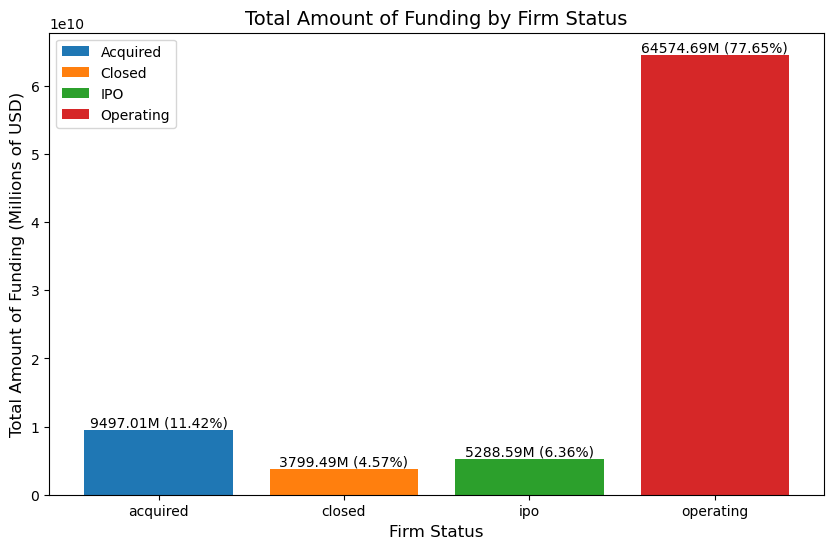

In [30]:
# Bar chart of total amount of fundings by startups status
# Group the data by firm status and calculate the total amount of funding for each group
df_grouped = df_merged_final.groupby("status").sum()["funding_total_usd"]

# Create a bar chart with one bar for each firm status group
plt.figure(figsize=(10,6))
bars = plt.bar(df_grouped.index, df_grouped.values, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])

# Add count labels and titles
plt.xlabel("Firm Status", fontsize = 12)
plt.ylabel("Total Amount of Funding (Millions of USD)", fontsize = 12)
plt.title("Total Amount of Funding by Firm Status", fontsize = 14)
for i, value in enumerate(df_grouped.values):
    plt.text(i, value, f'{value/1000000:.2f}M ({value/df_merged_final["funding_total_usd"].sum()*100:.2f}%)', 
             ha='center', va='bottom', fontsize = 10)

# Add a legend to explain the colors and the firm status groups
legend_labels = ["Acquired", "Closed", "IPO", "Operating"]
plt.legend(bars, legend_labels, loc="upper left")

plt.show()

As can be seen in the bar chart above, startups in the status of operating secured most of the fundings (77.65%). While this is largely due to the massive number of operating startups. What is worth noticing here is that ipo has a higher percentage than the closed startups in terms of total amount of fundings they secured, which is different from the percentage in terms of startups frequency. It can be interpreted as IPO startups are relatively successful in attracting significant funding, despite being the lowest in number. Closed startups, securing the lowest amount of fundings, may be either explained by the companies themselves are not successful in attracting fundings, or that they were not able to secure enough funding to sustain operations. Both lead to an outcome of startups failure.

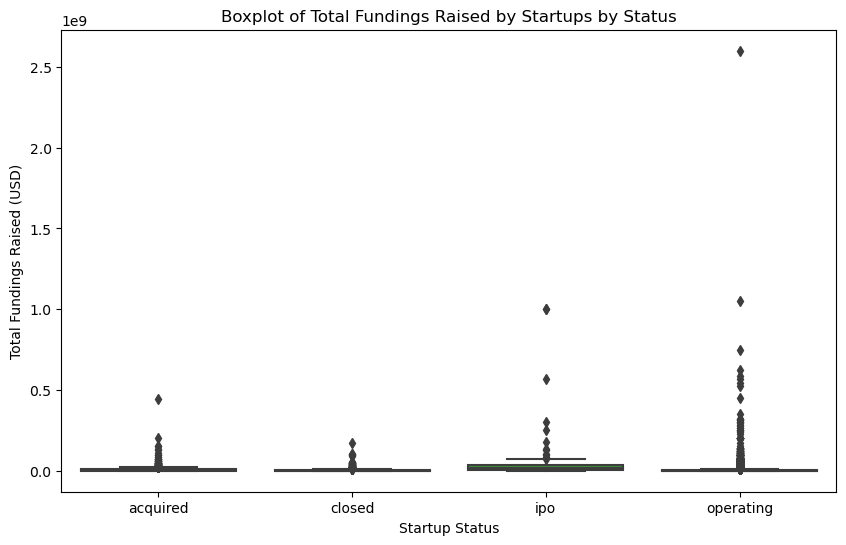

In [31]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='funding_total_usd', data=df_merged_final, order=["acquired", "closed", "ipo", "operating"])

# Set the plot title and axis labels
plt.title('Boxplot of Total Fundings Raised by Startups by Status')
plt.xlabel('Startup Status')
plt.ylabel('Total Fundings Raised (USD)')

# Show the plot
plt.show()

As can be seen in the boxplot above, the data points are squeezed together. This is likely due to the presence of outliers, which results in a large range in the data, particularly for the "operating" firm status. One way to address this issue is to use a log scale for the y-axis, which can help spread out the data points and make it easier to visualize the percentiles.

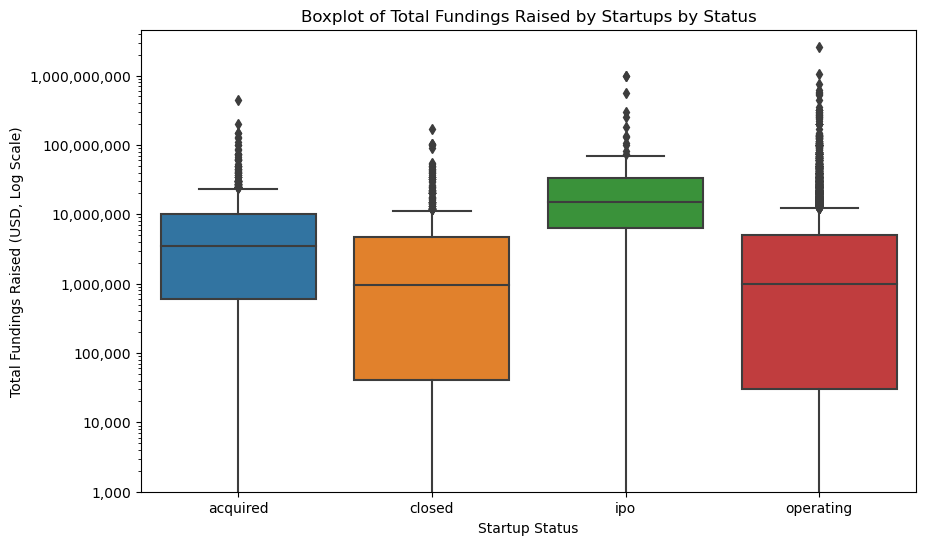

In [32]:
# Create a boxplot
plt.figure(figsize=(10, 6))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
sns.boxplot(x='status', y='funding_total_usd', data=df_merged_final, order=["acquired", "closed", "ipo", "operating"], palette=sns.color_palette(colors))

# Set the plot title and axis labels
plt.title('Boxplot of Total Fundings Raised by Startups by Status')
plt.xlabel('Startup Status')
plt.ylabel('Total Fundings Raised (USD, Log Scale)')

# Set y-axis to log scale
plt.yscale("log")

# Set y-axis tick labels
yticks = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9]
plt.yticks(yticks, [f'{y:,}' for y in yticks])

plt.show()

For the "closed" startups, the median funding amount is around 1 million in log scale. The IQR spans from approximately 55,000 to 7 million (in log scale), suggesting that 50% of closed startups received funding within this range. There are several outliers with much higher funding amounts, but they are relatively few compared to the total number of closed startups.

For the "operating" startups,the 25th, 50th, and 75th percentile of funding amount is generally the same compared to the "closed" startups, with the 25th slightly lower. This indicates that operating startups generally secure similar funding amounts compared to closed startups. However, the range of funding amounts for operating startups is much wider than that of closed startups, with many outliers having received very high amounts of funding. In fact, the highest value exceeds 1000 million, making the range of operating startups very large.

For the "acquired" startups, the median funding amount is higher than both closed and operating startups, at around 50.5 million in log scale. Furthermore, the IQR ranges from roughly 775,000 to 10 million in log scale, suggesting that acquired startups tend to secure more substantial funding amounts than closed and operating startups. There are also some outliers with very high funding amounts, approaching 1000 million in log scale. This indicates that the funding landscape for acquired startups is quite different from that of closed and operating startups.

For the "ipo" startups, the median funding amount is the highest among all the four statuses, which is greater than 10 million in log scale. However, the IQR is the narrowest compared to the other 3 statuses, which ranges from about 7,750,000 to 55 million in log scale. This suggests that while the median funding amount for "ipo" startups is high, the range of funding amounts is not as wide as that of operating startups. Additionally, there are fewer outliers with high funding amounts, compared to the other 3 statuses. Amount of funding for ipo startups generally concentrates within a narrow range.  

The funding distribution among startups with different statuses reveals some interesting patterns.

It can be seen that the fundings are not evenly distributed among startups with different statuses. Startups that eventually go public (IPO) or get acquired tend to receive higher median funding compared to those that are still operating or eventually close. This suggests that investors may be more willing to fund startups with greater potential for success and high returns on investment, which is linked to factors mentioned in the research question such as initial funding round time, market sector, and geographic location.

There are some implications for risk and funding strategy, which also play a role in shaping the funding landscape for startups, and can be considered as contextual factors. For example, closed and operating startups have a wider range of funding amounts, with many outliers. This may indicate that there is a higher level of risk associated with investing in these types of startups, as their future outcomes are more uncertain. Such uncertainty can be influenced by initial funding round time, market sector, and geographic location. Investors may need to diversify their portfolios to account for this higher risk when investing in early-stage or less successful startups.

Acquired and IPO startups tend to secure larger funding amounts than closed and operating startups. This may suggest that higher funding levels are associated with better chances of success. However, it does not necessarily mean that more funding guarantees success. Many other factors, such as the management team, market conditions, and product-market fit, also play a crucial role in determining a startup's success. These factors can interact with the initial funding round time, market sector, and geographic location to shape the overall funding landscape for startups.

Finally, the funding landscape for startups can also be affected by the overall economic environment. For example, during periods of economic growth, there may be more funding available for startups, leading to a wider range of funding amounts. Conversely, during economic downturns, such as the recent COVID-19 pandemic, funding may become scarce, leading to narrower funding ranges that could potentially impact the success of startups. This highlights the importance of considering the broader economic context when examining the relationship between initial funding round time, market sector, geographic location, and the total amount of funding a startup can secure.

## 2.2 Maps and Interpretations

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import qeds

In [34]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.geometry.name

'geometry'

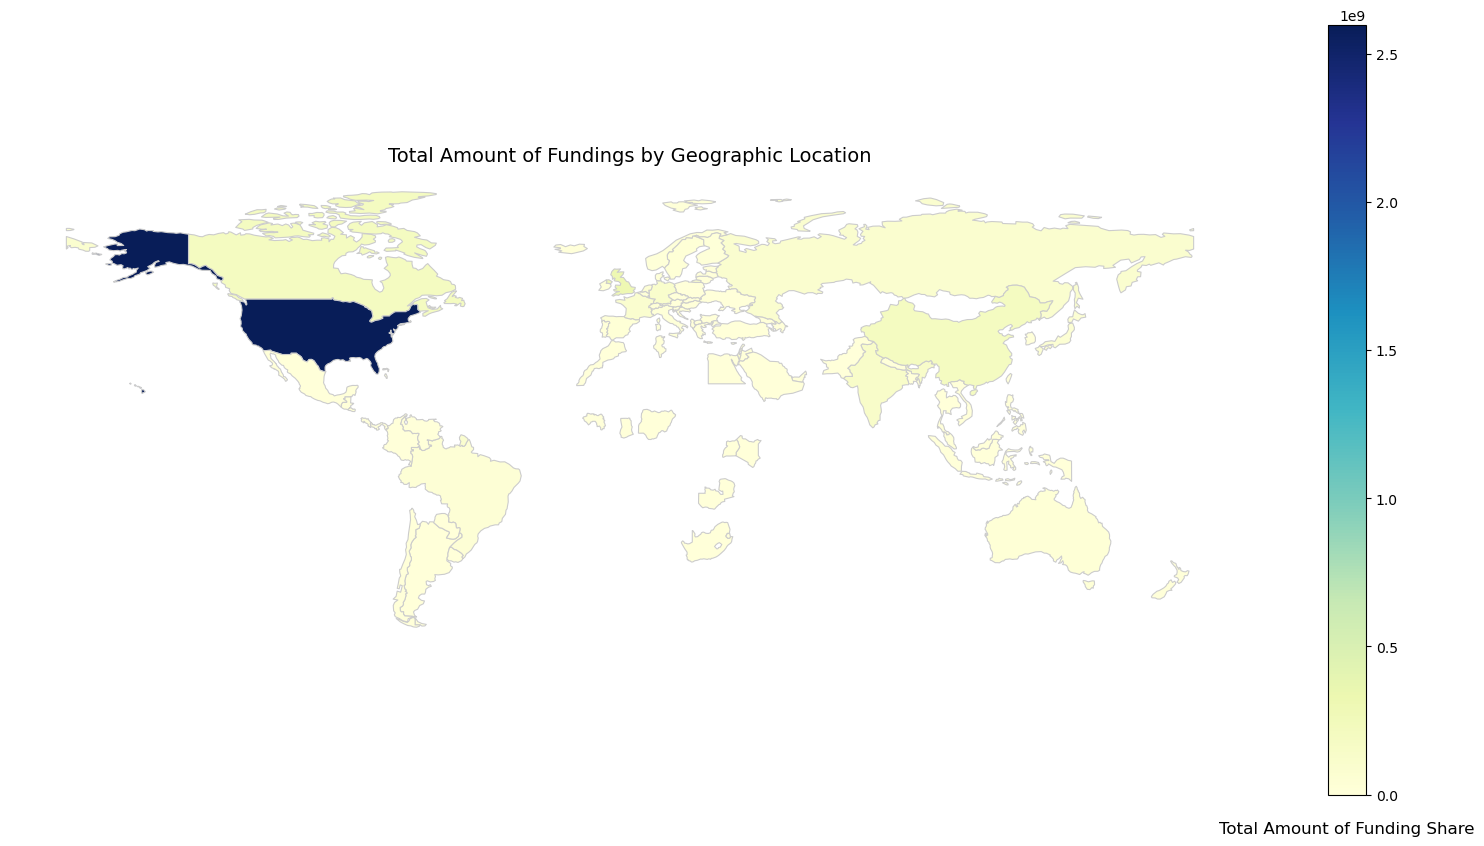

In [35]:
# Map 1: Total Amount of Funding (in USD) by Geographic Location (Country)
# Read the world shapefile and set the index to the ISO 3 code
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# Group the data by country and calculate the total amount of funding for each group
df_grouped = df_merged_final.groupby("country_code").sum()["funding_total_usd"]

# Merge the funding data with the world shapefile based on the ISO 3 code
world_merged = world.join(df_grouped)

# Create a figure with subplots
fig, ax = plt.subplots(1, figsize=(20, 10))

# Set the title of the plot
ax.set_title("Total Amount of Fundings by Geographic Location", fontsize = 14)

# Plot the world map with the total funding as the color
world_merged.plot(column = "funding_total_usd", cmap = "YlGnBu", linewidth = 0.8, ax = ax, edgecolor = '0.8')

# Remove the axis
ax.axis('off')

# Add a colorbar
vmin, vmax = df_merged_final["funding_total_usd"].min(), df_merged_final["funding_total_usd"].max()
sm = plt.cm.ScalarMappable(cmap = "YlGnBu", norm=plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm)
# Add label underneath the colorbar
cbar.ax.text(0.5, -0.05, 'Total Amount of Funding Share', fontsize = 12, ha = 'center', transform = cbar.ax.transAxes)

plt.show()

It can be seen that the majority of fundings are secured by startups the United States. However, this map showing the total amount of funding (in USD) by country can give only a brief view of whether most fundings are secured. It is not that informative due to the massive number of startups within one country, thus yielding more fundings for sure. To increase the map's informativeness, the USA is excluded and a separate map is created to display the total amount of funding by geographic location. The USA is displayed in gray, while data for other regions is visualized. It's important to note that some regions may also be displayed in gray if they don't have any data points.

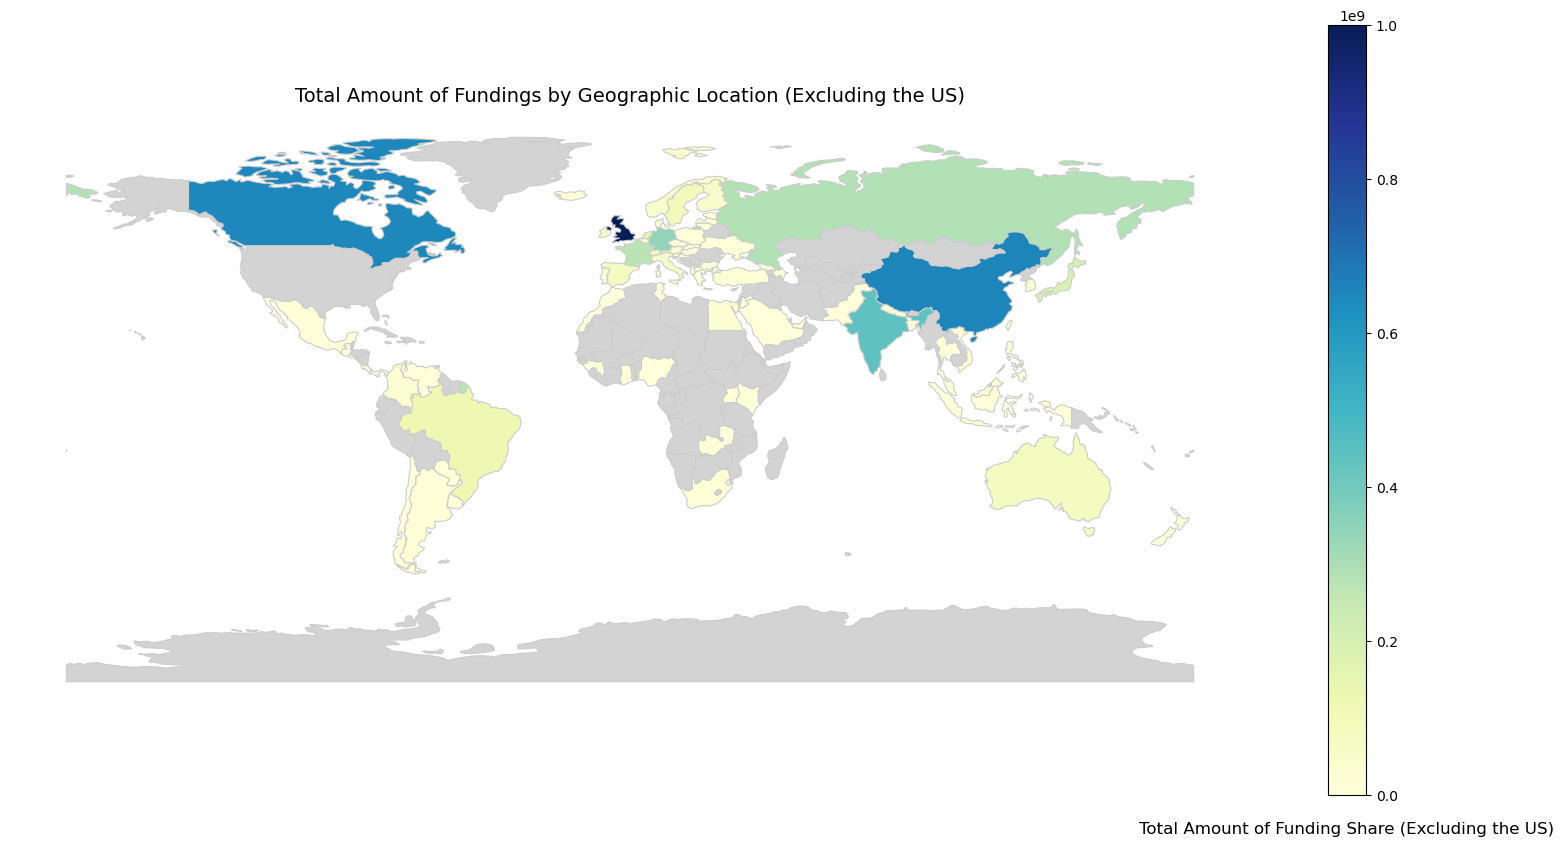

In [36]:
# Map 2: Total Amount of Funding (in USD) by Geographic Location (Country), excluding USA
# Group the data by country and calculate the total amount of funding for each group
df_grouped = df_merged_final.groupby("country_code").sum()["funding_total_usd"]

# Merge the funding data with the world shapefile based on the ISO 3 code
world_merged = world.join(df_grouped)

# Create a figure with subplots
fig, ax = plt.subplots(1, figsize=(20, 10))

# Set the title of the plot
ax.set_title("Total Amount of Fundings by Geographic Location (Excluding the US)", fontsize=14)

# Remove the United States from the funding data
world_merged.loc["USA", "funding_total_usd"] = None

# Plot the world map with the total funding as the color (excluding the US)
world_merged.plot(column="funding_total_usd", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={"color": "lightgray"})

# Remove the axis
ax.axis('off')

# Add a colorbar
vmin, vmax = df_merged_final.loc[df_merged_final['country_code'] != "USA", "funding_total_usd"].min(), df_merged_final.loc[df_merged_final['country_code'] != "USA", "funding_total_usd"].max()
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
# Add label underneath the colorbar
cbar.ax.text(0.5, -0.05, 'Total Amount of Funding Share (Excluding the US)', fontsize=12, ha='center', transform=cbar.ax.transAxes)

plt.show()

Based on map 2 above, the top 3 regions with the most total amount of fundings are UK, Canada and China. These countries are know to have a diverse range of projects. In the UK, for example, there are many startups currently focusing on fintech, while Canada has a strong presence in the healthcare industry. China, on the other hand, has a thriving e-commerce industry that has attracted a lot of investment in recent years. Overall, it's clear that these regions have a lot of potential for future growth and innovation in the startup world.

Another map showing the average amount of fundings per startup by country is created below. By taking the number of startups in each country into account also makes the map more informative.

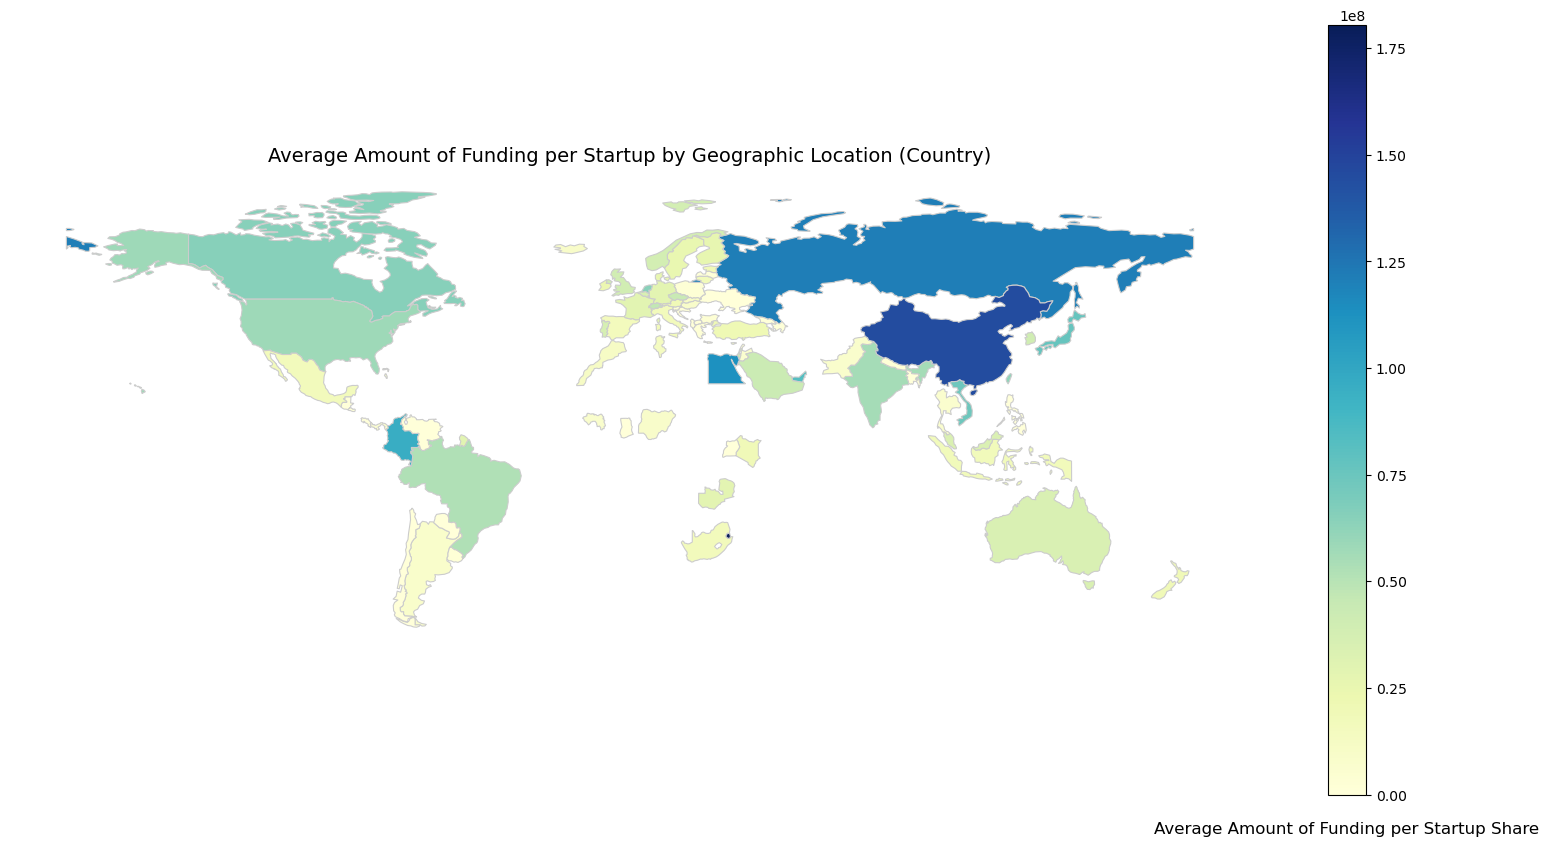

In [37]:
# Map 3: Average Amount of Funding per Startup by Geographic Location (Country)
# Read the world shapefile and set the index to the ISO 3 code
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# Group the data by country and calculate the average amount of funding per startup for each group
avg_funding_per_startup = df_merged_final["funding_total_usd"].sum() / 11526
df_grouped = df_merged_final.groupby("country_code").sum()["funding_total_usd"] / df_merged_final.groupby("country_code").count()["funding_total_usd"]

# Merge the funding data with the world shapefile based on the ISO 3 code
world_merged = world.join(df_grouped)

# Create a figure with subplots
fig, ax = plt.subplots(1, figsize=(20, 10))

# Set the title of the plot
ax.set_title("Average Amount of Funding per Startup by Geographic Location (Country)", fontsize = 14)

# Plot the world map with the average funding per startup as the color
world_merged.plot(column = "funding_total_usd", cmap = "YlGnBu", linewidth = 0.8, ax = ax, edgecolor = '0.8')

# Remove the axis
ax.axis('off')

# Add a colorbar
vmin, vmax = df_grouped.min(), df_grouped.max()
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
# Add label underneath the colorbar
cbar.ax.text(0.5, -0.05, 'Average Amount of Funding per Startup Share', fontsize = 12, ha = 'center', transform = cbar.ax.transAxes)

plt.show()

The map of total amount of fundings (in USD) by country (map 1) shows that startups in USA are securing the majority of fundings, represented by the dark blue in that region, while the other regions barely show any colors. Interestingly, in the map of average amount of funding per startup by country above, the highest color concentration appears in the Asia region, with China having the darkest color, indicating the highest average amount of funding per startup secured. This corresponds to the results from Map 2, indicating that China has a considerable number of startups securing substantial amounts of funding. On the other hand, countries in North America have a medium concentration of color. Although they still receive a relatively significant amount of funding per startup, the amount raised by startups in the USA and Canada is not as impressive as presented in Maps 1 and 2 above. This is also true for the UK, which stands out in terms of the total amount of funding secured by startups within the country, but not in terms of the average amount of funding per startup.

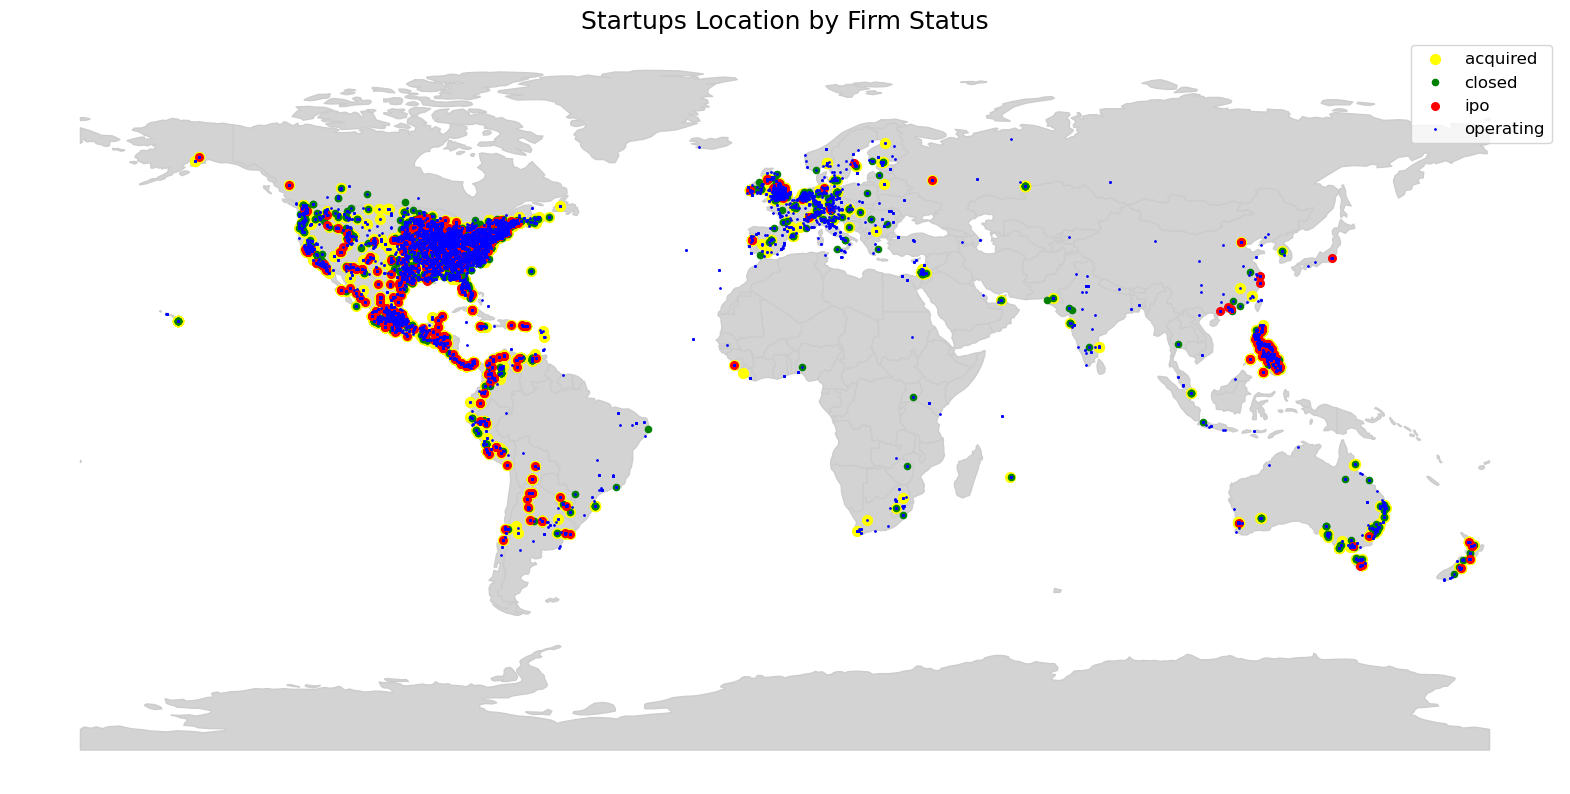

In [38]:
# Map 4: Geographic Location of Startups by Firm Statuses
# Read in the city coordinates
df_cities = pd.read_csv(r"\Users\user\Desktop\ECO225\ECO225Project\Data\cities500.txt", sep="\t", header=None, 
                          dtype={13: str},
                          names=["geonameid", "name", "asciiname", "alternatenames", "latitude", "longitude", "feature class", 
                                 "feature code", "country code", "cc2", "admin1 code", "admin2 code", "admin3 code", "admin4 code", 
                                 "population", "elevation", "dem", "timezone", "modification date"])
# Rename the "name" column to "city"
city_coords = df_cities.rename(columns={"name": "city"})
# Drop the rows where latitude or longitude is missing
city_coords = city_coords.dropna(subset=["latitude", "longitude"])
# Select only the columns that are needed
df_cities = city_coords[["city", "latitude", "longitude"]]

# Merge the data with the city coordinates
df_merged = df_new.merge(city_coords, on="city", how="left")

# Read in the world shapefile
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# Create a GeoDataFrame from the merged data
gdf = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.longitude, df_merged.latitude))

# Group the data by firm status and calculate the count and total funding for each group
df_grouped = df_merged.groupby("status").agg({"city": "count", "total amount of funding (USD)": "sum"})

# Define the colors and sizes for each status category
colors = {"operating": "blue", "acquired": "yellow", "closed": "green", "ipo": "red"}
sizes = {"operating": 1, "acquired": 50, "closed": 20, "ipo": 30}

# Create a figure with subplots
fig, ax = plt.subplots(1, figsize=(20, 10))

# Set the title of the plot
ax.set_title("Startups Location by Firm Status", fontsize = 18)

# Plot the world map
world.plot(ax = ax, color ="lightgray", edgecolor='0.8')

# Plot the startups as dots, colored and sized by their status
for status, group in gdf.groupby("status"):
    group.plot(ax = ax, color = colors[status], markersize = sizes[status], label = status)

# Add the legend
ax.legend(fontsize = 12)

# Remove the axis
ax.axis('off')

plt.show()

This map helps visualize where the headquarter positions (cities) of the startups are located. As can be seen, most of the startups (of all types) are clustered in the United States, which corresponds to the high color concentration of the USA region shown in Map 1. It's also worth noting that a majority of startups are also clustered in Europe. Relating to the information presented in Map 1, 2 and 3, it's surprising that despite having a significant number of startups located within Europe, the amount of funding raised by the startups in Europe are still not so much. 

It can also be seen that startups are also "dense" within Philippines. This can probably be explained by the country's rich natural resources and cheap raw materials, such as rubber, and its motivated human labor, as well as its supportive and business-friendly economy and governmental policies.

Furthermore, majority of the startups are located along the coasts of the continents, which conforms to the general knowledge that coastal areas are more developed than inland regions. Cities located along coasts have greater access to importing and exporting goods. Additionally, coastal areas have flatter terrain, which allows for convenient and fast transportation, facilitating more trades.

# Project 3

## 3.1 Potential Data to Scrape

To enhance this research, it would be useful to include information on startup accelerators and incubators. These organizations provide resources, mentorship, and funding opportunities to startups, which can help them grow and succeed. By scraping these data, we can gain insights into which geographic regions and market sectors these organizations mostly focus on, and how they relate to the funding success of startups, which is the research question.

The data to be scraped can be found on the Seed-DB website (https://www.seed-db.com/accelerators), which provides a list of startup accelerators and incubators around the world. Seed-DB also provides information about the organizations, such as their names, locations, funding year, and funding amount.

The datasets from Seed-DB will be merged with the existing dataset to analyze the impact of accelerator and incubator involvement on startup funding success. Statistical analysis will be performed to determine this impact, taking into account the geographic location, market sector, and initial funding round time, the three independent variables of the research question. The analysis will provide additional insights into the factors contributing to startup funding success and help answer the research question.

## 3.2 Potential Challenges

Scraping Seed-DB may present several potential challenges: 
1) The website may undergo frequent and regular structural changes. In other words, the website's layout may change over time. Whenever Seed-DB modifies its HTML structure or class names, the web scraping script may not work as expected and would need to be updated accordingly, which requires additional work. 

2) The data on the website may be updated. Therefore, it is necessary to track changes in the data over time, whether daily, monthly, quarterly or annually. Scheduling the script to run at the desired intervals would be necessary for this purpose. Regarding the dataset's characteristics, it is unlikely that the data will be updated frequently. Therefore, tracking changes quarterly or annually may be sufficient.

3) After scraping data, it may need to be cleaned, validated, or preprocessed before further use. This may involve handling missing or inconsistent data, converting data types, or normalizing data. These tasks add to the workload before the data can be used.The original dataset includes information on numerous startups. However, the first page of Seed-DB only includes a table with information on accelerators. If intending to scrape data on startups, I will need to navigate to another page by clicking the link of each accelerator in the table. There are also 2 different tabs in the new page, "view by cohort" and "view by companies". The table under the "view by companies" tab is the one that needs to be scraped. While web-scraping multiple pages is already challenging, merging the scraped data with the original data is more complicated. It is difficult to fully match the startups keys from the two dataframes, making cleaning the data the most challenging process.

To simplify the scraping process, only the first page of Seed-DB with accelerators data will be scraped. Despite not scraping information of startups, information on accelerators can still provide adequate insights into the research question. Outer merge would make sense in this case as not all the startups in the original dataset can be associated with accelerators list on Seed-DB. The 2 dataframes will be merged on the common identifier, geographic location, instead of startups name. With the merged dataset, the relationship between the prescence of accelerators (the geographic location) and the total amount of funding secured by startups can be explored. 

## 3.3 Scraping Data from a Website

In [83]:
%%capture
!pip install requests
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import csv

In [40]:
import requests
from bs4 import BeautifulSoup
import csv

url = 'https://www.seed-db.com/accelerators'

# Defining a function to get table data from the Seed-DB website url
def get_table_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser') # parse the HTML content
    table = soup.find('table', {'class': 'tablesorter'}) # Find the table with the 'tablesorter' class
    headers = []  # Extract the table headers
    for header in table.find_all('th'):
        headers.append(header.text.strip())
    rows = table.find_all('tr')[1:] # Extract the table rows, excluding the header row
    data = [] # Extract the data from each row
    for row in rows:
        rowData = []
        for cell in row.find_all('td'):
            rowData.append(cell.text.strip())
        data.append(rowData)
    return headers, data

# Defining a function to write the scraped data to a CSV file
def write_to_csv(headers, data, file_name):
    with open(file_name, 'w', newline='', encoding='utf-8') as f:  # Open a new CSV file with the given file name
        writer = csv.writer(f)  # Create a CSV writer object
        writer.writerow(headers)  # Write the headers to the CSV file
        writer.writerows(data) # Write the data rows to the CSV file

headers, data = get_table_data(url)  # Scrape the table data from the URL by passing the 'url' as an argument
write_to_csv(headers, data, 'accelerators_data.csv') 

In [41]:
# Creating an accelerators dataframe using the headers and data
accelerators_df = pd.DataFrame(data, columns=headers)
accelerators_df

Program                                 Location  \
0                     10-xcelerator                          Columbus, OH US   
1                        Betaspring                        Providence, RI US   
2    Excelerate Labs\nNot Operating                           Chicago, IL US   
3                       FounderFuel                              Montreal CA   
4                           HAXLR8R  Shenzhen, China & Silicon Valley, CA CN   
..                              ...                                      ...   
185      ProSiebenSat.1 Accelerator                                Munich DE   
186                 Lighthouse Labs                          Richmond, VA US   
187                             NFX                         Palo Alto, CA US   
188                     TopSeedsLab                                Madrid ES   
189        Open Education Challenge                              pan-EMEA EU   

    # Co's                $ Exits              $ Funding  \
0       19  $                   0  $           9,815,000   
1       71  $          14,000,000  $          67,938,534   
2       30  $          19,500,000  $         171,207,664   
3       69  $                   0  $         787,760,795   
4       39  $                   0  $         144,249,387   
..     ...                    ...                    ...   
185     13  $                   0  $           9,324,281   
186     33  $                   0  $          41,599,319   
187     66  $             500,000  $         720,053,572   
188      0  $                   0  $                   0   
189      0  $                   0  $                   0   

                 Average $  
0    $             516,578  
1    $             956,880  
2    $           5,706,922  
3    $          11,416,823  
4    $           3,698,702  
..                     ...  
185  $             717,252  
186  $           1,260,585  
187  $          10,909,902  
188                         
189                         

[190 rows x 6 columns]

The table above displays accelerator data scraped from the first page of the Seed-DB website. As the original dataset and the scraped accelerator data do not have a direct unique identifier to merge on, the location column (city and country), which has the most common information in both dataframes, is chosen as the common key to merge on and identify startups located in areas with accelerators.

## 3.4 Merging the Scraped Dataset

In [42]:
# Defining a function to find the index of a row in the accelerators_df based on city name
def findIndex(row):
    city = row['city']  # only check for city match since there is no match between the country codes in the 2 dataframes
    # (If the city matches, it indicates that the country is the same, so there is no need to check whether the country code matches.)

    # Loop through the "Location" column of accelerators_df to find a match
    for idx, location in enumerate(accelerators_df['Location']): 
        # Check for missing city values
        if pd.isna(city):
            return np.nan
        
        # If the city name is found in the location string
        if (str(city) in location):
            return idx  # returns the index of the matching row in accelerators_df
    return np.nan # if no match is found

# Apply the findIndex function to each row in the original DataFrame (df_new)
# This creates a new column "match_index" that stores the matching index in accelerators_df
df_new['match_index'] = df_new.apply(findIndex, axis=1)

# Outer merge the original DataFrame (df_new) and accelerators_df
# The merge is based on the 'match_index' column in df_new and the index of accelerators_df
merged_df = pd.merge(df_new, accelerators_df, left_on='match_index', right_index=True, how='outer')

# Drop the 'match_index' column as it's no longer needed
merged_df = merged_df.drop(columns=['match_index']).reset_index(drop=True)

merged_df

funded object id    city country  total amount of funding (USD)  \
0                 c:26  London     GBR                     13200000.0   
1                c:132  London     GBR                      5000000.0   
2                c:162  London     GBR                      5000000.0   
3                c:229  London     GBR                      5000000.0   
4                c:287  London     GBR                     43000000.0   
...                ...     ...     ...                            ...   
11608              NaN     NaN     NaN                            NaN   
11609              NaN     NaN     NaN                            NaN   
11610              NaN     NaN     NaN                            NaN   
11611              NaN     NaN     NaN                            NaN   
11612              NaN     NaN     NaN                            NaN   

      entity type market sector     status first funding at name  month  \
0         Company   games_video     closed       2005-06-01  NaN    6.0   
1         Company         music   acquired       2006-05-01  NaN    5.0   
2         Company           web  operating       2006-04-01  NaN    4.0   
3         Company     ecommerce   acquired       2005-07-01  NaN    7.0   
4         Company   games_video  operating       2005-09-01  NaN    9.0   
...           ...           ...        ...              ...  ...    ...   
11608         NaN           NaN        NaN              NaT  NaN    NaN   
11609         NaN           NaN        NaN              NaT  NaN    NaN   
11610         NaN           NaN        NaN              NaT  NaN    NaN   
11611         NaN           NaN        NaN              NaT  NaN    NaN   
11612         NaN           NaN        NaN              NaT  NaN    NaN   

                                Program              Location # Co's  \
0      Seedcamp\n\n\n\nBecame Seed Fund             London UK    118   
1      Seedcamp\n\n\n\nBecame Seed Fund             London UK    118   
2      Seedcamp\n\n\n\nBecame Seed Fund             London UK    118   
3      Seedcamp\n\n\n\nBecame Seed Fund             London UK    118   
4      Seedcamp\n\n\n\nBecame Seed Fund             London UK    118   
...                                 ...                   ...    ...   
11608                           NextHIT        Houston, TX US      0   
11609                  emerge Xcelerate   Grand Rapids, MI US      0   
11610      Illumina Accelerator Program  San Francisco, CA US      0   
11611                   Upstart Memphis        Memphis, TN US      4   
11612          Open Education Challenge           pan-EMEA EU      0   

                     $ Exits              $ Funding              Average $  
0      $         137,000,000  $       1,495,672,796  $          12,675,193  
1      $         137,000,000  $       1,495,672,796  $          12,675,193  
2      $         137,000,000  $       1,495,672,796  $          12,675,193  
3      $         137,000,000  $       1,495,672,796  $          12,675,193  
4      $         137,000,000  $       1,495,672,796  $          12,675,193  
...                      ...                    ...                    ...  
11608  $                   0  $                   0                         
11609  $                   0  $                   0                         
11610  $                   0  $                   0                         
11611  $                   0  $              15,000  $               3,750  
11612  $                   0  $                   0                         

[11613 rows x 16 columns]

In [43]:
merged_df.to_csv('scraped.csv', index=False)

In [44]:
# Display the number of observations after merging
print("Number of observations after merging: ", len(merged_df))

Number of observations after merging:  11613


After merging the scraped data, the number of observations in the data is 11613.

Note that not all rows in the original df_new dataframe have a matching row in the accelerators_df dataframe based on the join keys (in this case, the "city" element), therefore many rows contain "NaN" values after performing an outer merge. For example, some location information from the accelerators_df are "Worldwide", "Silicon Valley, CA US", etc, which are not present in the df_new dataframe. However, downloading the CSV file reveals that there are still a decent amount of data that have matching rows. Even though these observations were not discarded during the merging process, they are useful for future regression analysis, which requires a lot of observations.

## 3.5 Visualizing the Scraped Dataset

To visualize the newly scraped data and explain its relation to the research question, visualizations that highlight the relationships between startup funding success (measured in terms of the amount of funding secured by the startups) and the presence of accelerators can be created.

In [84]:
%%capture
!pip install adjustText

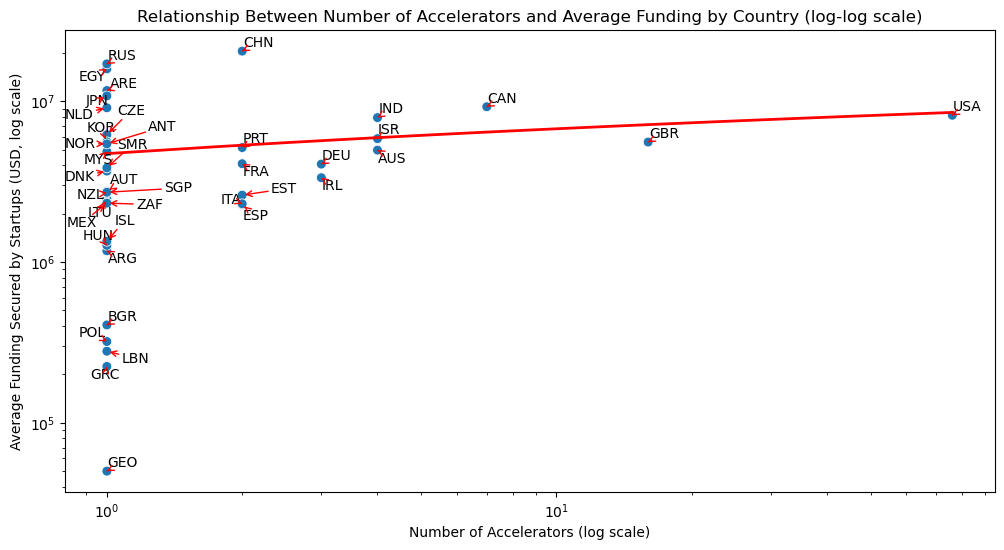

In [46]:
# Scatterplot of Number of Accelerators v.s. Average Funding Secured by Startups
from adjustText import adjust_text

# Group by city and count the unique accelerators
city_accelerator_count = merged_df.groupby(['country', 'city'])['Program'].nunique().reset_index()
city_accelerator_count.columns = ['country', 'city', 'num_accelerators']

# Group by country and calculate the average funding for startups
average_funding = merged_df.groupby('country')['total amount of funding (USD)'].mean().reset_index()
average_funding.columns = ['country', 'avg_funding']

# Group by country and sum the number of accelerators
country_accelerator_count = city_accelerator_count.groupby('country')['num_accelerators'].sum().reset_index()

# Merge the two resulting DataFrames
result_df = pd.merge(country_accelerator_count, average_funding, on='country')

# Remove rows with zero or NaN values in num_accelerators and avg_funding
result_df = result_df[(result_df['num_accelerators'] > 0) & (result_df['avg_funding'] > 0)].dropna()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x='num_accelerators', y='avg_funding', size=20, sizes=(50, 200), legend=None)

# Set logarithmic scale for both axes (for btter visualizing)
plt.xscale("log")
plt.yscale("log")

# Add country names as labels beside each scatter point
texts = []
for _, row in result_df.iterrows():
    t = plt.text(row['num_accelerators'], row['avg_funding'], row['country'], ha='center', va='center')
    texts.append(t)

# Adjust the position of the labels to minimize overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Add a regression line
sns.regplot(data=result_df, x='num_accelerators', y='avg_funding', scatter=False, color='red', line_kws={'linewidth': 2}, logx=True, ci=None)

# Set axis labels
plt.xlabel("Number of Accelerators (log scale)")
plt.ylabel("Average Funding Secured by Startups (USD, log scale)")

plt.title("Relationship Between Number of Accelerators and Average Funding by Country (log-log scale)")

plt.show()

The scatter plot above helps visualize the relationship between the number of accelerators in a country and the average funding amount secured by startups located in that country. Each scatter point represents a different country, with the x-coordinate of each point representing the number of accelerators in that country and the y-coordinate representing the average funding (in USD) received by startups in that country.

This scatter plot depicts a positive correlation between the number of accelerators and the average funding secured by startups. This correlation may be due to the tendency of businesses to cluster in specific locations where resources, infrastructure, and knowledge spillovers are more readily available. Consequently, startups located in countries like the USA, where the number of accelerators is high, are more likely to secure higher funding than those in countries like Georgia (GEO), where the number of accelerators is relatively low.

The trend also indicates that no country has a large number of accelerators but a low average funding secured by startups within the country. This could be because startups located in areas with many accelerators are more likely to receive mentorship and guidance, which may contribute to their ability to secure more funding on average. Additionally, the proximity to other startups and businesses allows for the exchange of ideas, experiences, and knowledge, leading to increased innovation and success. In contrast, startups located in regions with few accelerators may encounter challenges in accessing resources and mentorship, which could impede their growth and funding opportunities. In addition, the presence of more accelerators may indicate a more mature startup ecosystem, which can attract additional investment and resources.

Nevertheless, it's important to note that the relationship shown in this scatterplot only implies correlation, not causation. Other confounding variables, such as a country's overall economic development, the presence of large industries and technology hubs, or government support for innovation and entrepreneurship, may also influence the average funding secured by startups.

The above analysis of the relationship between number of accelerators and average funding by country focuses on the presence of accelerators in that country, regardless of whether the startups participated in the programs or not. As the presence of accelerators in a location can influence the overall startup ecosystem, it may potentially impact the funding opportunities for startups in the area, even if they don't participate in accelerator programs. This choice of analysis aligns with the research question, as it acknowledges the broader impact of accelerators on startup ecosystem and funding opportunities in a given location, rather than solely focusing on the direct participation of startups in accelerator programs.This approach provides a more comprehensive understanding of the factors that influence the total amount of funding a startup can secure, addressing the research question effectively and cohesively.

The presence of accelerators in a country plays an essential role in shaping the startup ecosystem and can contribute to the funding outcomes for startups, which are presented through the funding statuses. As a result, the relationship between the proportion of startups in different funding statuses across countries and the presence of accelerators can be analyzed. A stacked bar chart is created to visualize the relationship.

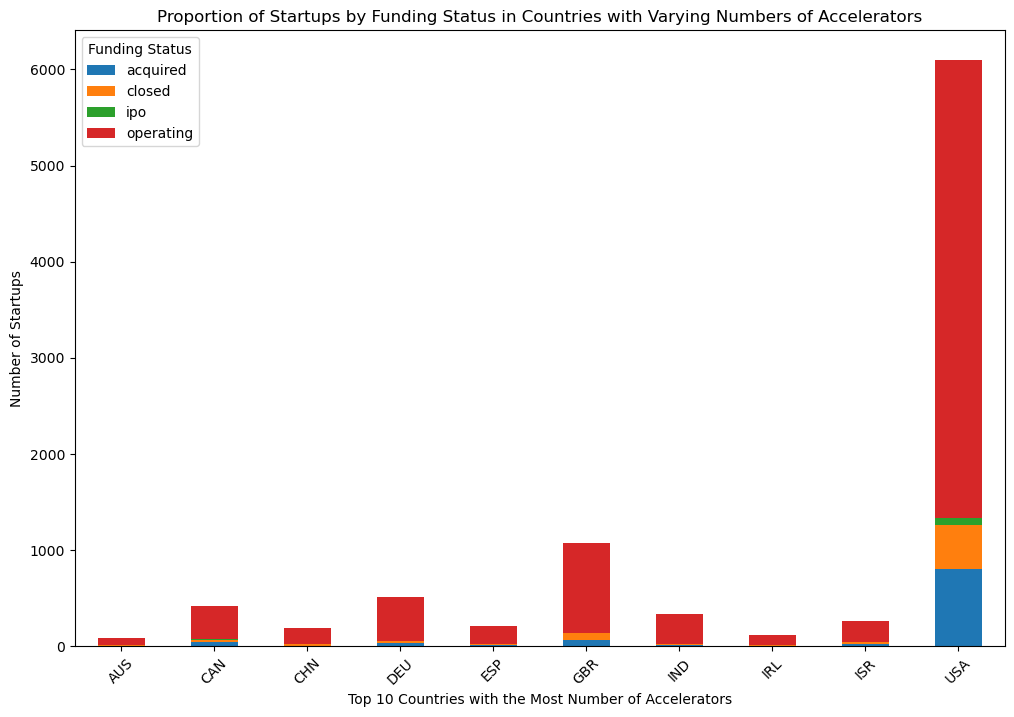

In [47]:
# Stacked bar chart: showing the proportion of startups in each funding status across countries with varying numbers of accelerators
# get a list of unique accelerators in each country
country_accelerators = merged_df.groupby('country')['Program'].nunique().reset_index(name='num_accelerators')

# select top 10 countries with the most accelerators
top_10_countries = country_accelerators.nlargest(10, 'num_accelerators')['country'].tolist()

# filter the data to include only startups in the top 10 countries
top_10_data = merged_df[merged_df['country'].isin(top_10_countries)]

# group the data by country and funding status, count the number of startups, and pivot the table
grouped_data = top_10_data.groupby(['country', 'status'])['funded object id'].count().reset_index(name='num_startups')
pivot_data = grouped_data.pivot_table(index='country', columns='status', values='num_startups', fill_value=0)

# plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_ylabel('Number of Startups')
ax.set_xlabel('Top 10 Countries with the Most Number of Accelerators')
ax.set_title('Proportion of Startups by Funding Status in Countries with Varying Numbers of Accelerators')
plt.xticks(rotation=45)
plt.legend(title='Funding Status')
    
plt.show()

Since it's hard to add number labels to the stacked bars without them being overlapping, an additional table is created to include the information of the number labels. The table has country names in the first column, followed by the number and percentage of startups in each funding status. The table will be sorted by the total number of accelerators in each top 10 country with the most number of accelerators in descending order.

In [48]:
# Table showing the information of the stacked bars
top_10_countries = ['USA', 'GBR', 'CAN', 'AUS', 'IND', 'ISR', 'DEU', 'IRL', 'CHN', 'ESP']

# Filter the country_accelerators dataframe to include only the top 10 countries
top_10_country_accelerators = country_accelerators[country_accelerators['country'].isin(top_10_countries)]

# Join the top_10_country_accelerators dataframe with the pivot_data dataframe
final_table = top_10_country_accelerators.set_index('country').join(pivot_data).reset_index()

# Sort the table in descending order by the number of accelerators
final_table = final_table.sort_values(by='num_accelerators', ascending=False)

# Rename the columns in the final table
final_table = final_table.rename(columns={"country": "Country", "num_accelerators": "Number of Accelerators", 
                                         "acquired": "Acquired", "closed": "Closed", "ipo": "IPO", "operating": "Operating"})

# Calculate the total number of startups in each country
final_table['total_startups'] = final_table[['Acquired', 'Closed', 'IPO', 'Operating']].sum(axis=1)

# Calculate the percentage of startups in each funding status
for status in ['Acquired', 'Closed', 'IPO', 'Operating']:
    final_table[f'{status}_%'] = (final_table[status] / final_table['total_startups']) * 100

# Format the number of startups in each funding status as 'number (percentage)'
for status in ['Acquired', 'Closed', 'IPO', 'Operating']:
    final_table[f'{status}_formatted'] = final_table.apply(lambda row: f"{row[status]} ({row[f'{status}_%']:.2f}%)", axis=1)

# Drop the original funding status columns and percentage columns
formatted_columns = [f"{status}_formatted" for status in ['Acquired', 'Closed', 'IPO', 'Operating']]
final_table = final_table[['Country', 'Number of Accelerators'] + formatted_columns]

final_table

Country  Number of Accelerators Acquired_formatted Closed_formatted  \
9     USA                      63       806 (13.21%)      459 (7.52%)   
5     GBR                      13         60 (5.60%)       74 (6.90%)   
1     CAN                       6        43 (10.31%)       26 (6.24%)   
0     AUS                       4          7 (7.69%)        4 (4.40%)   
6     IND                       4          9 (2.71%)       13 (3.92%)   
8     ISR                       4         21 (8.08%)       22 (8.46%)   
3     DEU                       3         29 (5.69%)       24 (4.71%)   
7     IRL                       3          6 (5.22%)       11 (9.57%)   
2     CHN                       2          4 (2.11%)      19 (10.00%)   
4     ESP                       2         10 (4.85%)       15 (7.28%)   

  IPO_formatted Operating_formatted  
9    73 (1.20%)       4764 (78.07%)  
5     0 (0.00%)        938 (87.50%)  
1     5 (1.20%)        343 (82.25%)  
0     1 (1.10%)         79 (86.81%)  
6     0 (0.00%)        310 (93.37%)  
8     1 (0.38%)        216 (83.08%)  
3     3 (0.59%)        454 (89.02%)  
7     0 (0.00%)         98 (85.22%)  
2     5 (2.63%)        162 (85.26%)  
4     0 (0.00%)        181 (87.86%)

The stacked bar chart above shows the proportion of startups in each funding status across the top 10 countries with the most accelerators. In most of the top 10 countries, the majority of startups fall under the "operating" funding status, indicating that a significant proportion of startups in these countries are actively functioning and raising funds. This trend could be influenced by the presence of accelerators, which may provide resources, mentorship, and connections to help startups succeed and secure funding.

However, there are also varying proportions of startups in other funding statuses, such as "acquired", "closed" and "ipo", which may reflect differences in the business environment, market condition of impact of accelerators in each country. The proportion of 'acquired' startups is relatively higher in countries like the United States, Canada, and Israel, compared to other countries in the top 10. This could suggest that startups in these countries have a higher likelihood of being acquired, which may be attributed to factors such as market size, industry maturity, investor preferences, and the effectiveness of the accelerators in nurturing startups towards successful exits.

For example, USA has a large and diverse market, a well-established business and capital environment, a high concentration of tech companies and a significant number of accelerators. The presence of accelerators may facilitate acquisition (refers to when one company acquiring possession of another company by purchasing shares), as they provide startups with more access to resources, mentorship and connection to potential acquirers. Examples of acquisition may include Facebook's acquisition of Instagram and WhatsApp. This may justify why USA has the highest proportion of "acquired" startups (13.21%).

This analysis offers insights into accelerators' role in a startup's funding success across various locations. Differences in funding statuses may reflect not only business environment and market conditions but also the role accelerators play in securing funding and achieving successful exits. This analysis, combined with initial funding round time and market sector investigation, helps provide a comprehensive understanding of the factors determining a startup's total funding.

## 3.6 Adding a New Dataset

Another local characteristics that can be taken into account is the median income by country. While median income by country is not directly related to the research question, it still provides valuable insight when considering the geographic location of a startup company. A higher median income in a country usually indicates a more developed economy, which may affect the startup ecosystem in the following ways:

1. Investment Environment: Countries with higher median incomes tend to have a more mature and developed business environment, which is favorable for investment. This can attract more investors and capital, increasing the likelihood of startups securing funding.

2. Purchasing Power: A higher median income means that consumers in that country have more disposable income to spend. Investors would perceive this as a larger market to target, thus making startups in that country more appealing.

3. Talent Pool: Countries with higher median incomes generally have better access to education and are more likely to cultivate better-educated and skilled workforces. This means that startups in these countries can have greater access to skilled labor, which can be a factor in attracting investment. Startups with strong, experienced teams are more likely to gain the trust of investors, and are therefore more likely to be considered for fund securing.

4. Infrastructure: Countries with higher median incomes are more likely to have well-developed infrastructure, such as reliable internet, transportation networks, and business support services. This can facilitate startups to operate and thrive, which is an appealing factor for investors to consider.

As a result, including median income by country in this research can enhance understanding of how the startup funding landscape varies across different countries. Median income data by country in 2023 obtained from *worldpopulationreview* will be used for the following analysis.

In [49]:
df_income = pd.read_csv(r'\Users\user\Desktop\ECO225\ECO225Project\Data\Median Income By Country 2023.csv', sep = ",")
df_income

place       pop2023  growthRate     area               country cca3 cca2  \
0      442  6.547680e+05     0.01107     2586            Luxembourg  LUX   LU   
1      784  9.516871e+06     0.00802    83600  United Arab Emirates  ARE   AE   
2      578  5.474360e+06     0.00737   323802                Norway  NOR   NO   
3      756  8.796669e+06     0.00643    41284           Switzerland  CHE   CH   
4      840  3.399966e+08     0.00505  9372610         United States  USA   US   
..     ...           ...         ...      ...                   ...  ...  ...   
157    108  1.323856e+07     0.02708    27834               Burundi  BDI   BI   
158    450  3.032573e+07     0.02411   587041            Madagascar  MDG   MG   
159    180  1.022628e+08     0.03285  2344858              DR Congo  COD   CD   
160    356  1.428628e+09     0.00808  3287590                 India  IND   IN   
161    156  1.425671e+09    -0.00015  9706961                 China  CHN   CN   

     ccn3         region                           subregion  landAreaKm  \
0     442         Europe                      Western Europe      2574.5   
1     784           Asia       Western Asia, The Middle East     71020.0   
2     578         Europe                     Northern Europe    364285.0   
3     756         Europe                      Western Europe     39516.0   
4     840  North America                    Northern America   9147420.0   
..    ...            ...                                 ...         ...   
157   108         Africa  Eastern Africa, Sub-Saharan Africa     25680.0   
158   450         Africa  Eastern Africa, Sub-Saharan Africa    581800.0   
159   180         Africa   Middle Africa, Sub-Saharan Africa   2267050.0   
160   356           Asia   Southern Asia, South Central Asia   2973190.0   
161   156           Asia                        Eastern Asia   9424702.9   

      density  densityMi  Rank  gdpPerCapitaPPP  meanIncome  medianIncome  \
0    254.3282   658.7101   168           124590       31376         26321   
1    134.0027   347.0670    96            70089       27017         24292   
2     15.0277    38.9217   119            70005       25272         22684   
3    222.6103   576.5607   101            72376       25787         21490   
4     37.1686    96.2666     3            65297       25332         19306   
..        ...        ...   ...              ...         ...           ...   
157  515.5202  1335.1973    78              784         640           475   
158   52.1240   135.0011    50             1719         567           398   
159   45.1083   116.8305    15             1146         548           395   
160  480.5033  1244.5036     1             6996        1314             0   
161  151.2696   391.7884     2            16829        4246             0   

     giniIndex  percBelowPovertyLine  rank  
0         0.35                  0.00     1  
1         0.33                  0.00     2  
2         0.27                  0.00     3  
3         0.33                  0.00     4  
4         0.41                  0.01     5  
..         ...                   ...   ...  
157       0.39                  0.31   158  
158       0.43                  0.39   159  
159       0.42                  0.39   160  
160       0.36                  0.05   161  
161       0.38                  0.00   162  

[162 rows x 20 columns]

In [50]:
df_income = df_income.rename(columns = {"country": "country full name", "cca3": "country"})
merge = pd.merge(df_new, df_income, on = "country", suffixes = ('_df_new', '_df_income'))
merge

funded object id      city country  total amount of funding (USD)  \
0                 c:26    London     GBR                     13200000.0   
1                 c:83    Oxford     GBR                            0.0   
2                c:132    London     GBR                      5000000.0   
3                c:162    London     GBR                      5000000.0   
4                c:229    London     GBR                      5000000.0   
...                ...       ...     ...                            ...   
11339         c:258141      Baku     AZE                       100000.0   
11340         c:262330      Baku     AZE                       200000.0   
11341         c:267396  San José     CRI                        40000.0   
11342         c:272393  Lausanne     SWZ                     40000000.0   
11343         c:275592   Liestal     SWZ                     11141000.0   

      entity type market sector     status first funding at name  month  ...  \
0         Company   games_video     closed       2005-06-01  NaN      6  ...   
1         Company           web     closed       2006-03-01  NaN      3  ...   
2         Company         music   acquired       2006-05-01  NaN      5  ...   
3         Company           web  operating       2006-04-01  NaN      4  ...   
4         Company     ecommerce   acquired       2005-07-01  NaN      7  ...   
...           ...           ...        ...              ...  ...    ...  ...   
11339     Company   advertising  operating       2013-03-15  NaN      3  ...   
11340     Company         other  operating       2013-09-06  NaN      9  ...   
11341     Company      software  operating       2013-11-25  NaN     11  ...   
11342     Company       biotech  operating       2013-10-16  NaN     10  ...   
11343     Company       biotech  operating       2013-10-30  NaN     10  ...   

       landAreaKm   density  densityMi  Rank  gdpPerCapitaPPP meanIncome  \
0        241930.0  279.9851   725.1615    21            49931      18133   
1        241930.0  279.9851   725.1615    21            49931      18133   
2        241930.0  279.9851   725.1615    21            49931      18133   
3        241930.0  279.9851   725.1615    21            49931      18133   
4        241930.0  279.9851   725.1615    21            49931      18133   
...           ...       ...        ...   ...              ...        ...   
11339     82646.0  125.9910   326.3167    90            15041       3851   
11340     82646.0  125.9910   326.3167    90            15041       3851   
11341     51060.0  102.0794   264.3856   124            21737       8440   
11342     17200.0   70.3966   182.3273   159             9003       2091   
11343     17200.0   70.3966   182.3273   159             9003       2091   

      medianIncome  giniIndex percBelowPovertyLine rank  
0            14793       0.35                 0.00   17  
1            14793       0.35                 0.00   17  
2            14793       0.35                 0.00   17  
3            14793       0.35                 0.00   17  
4            14793       0.35                 0.00   17  
...            ...        ...                  ...  ...  
11339         3193       0.27                 0.00   71  
11340         3193       0.27                 0.00   71  
11341         5457       0.48                 0.01   47  
11342         1097       0.55                 0.10  124  
11343         1097       0.55                 0.10  124  

[11344 rows x 30 columns]

In [51]:
import plotly.express as px

In [52]:
# Bubble Map of total funding and median income (in USD) by geographic location (country)
fig = px.scatter_geo(merge,
                     locations="country full name",
                     locationmode='country names',
                     size='total amount of funding (USD)',
                     color='medianIncome',
                     hover_name='country full name',
                     projection='natural earth',
                     title='Bubble Map of Total Funding and Median Income (in USD) by Country',
                     color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In the bubble map above, the size of the bubble represents the total amount of funding per country, and the color intensity represents the median income of that country, which help visualize the relationship between the total amount of funding that startups secured by country, median income by country and geographic location by country. 

The map shows that countries like the USA, Canada, and China have larger bubbles, indicating that these countries have secured higher amounts of funding for their startups. This suggests that startups in these countries are more successful in attracting investments compared to countries with smaller bubbles. Moreover, countries with startups securing higher amounts of funding, such as the USA and Canada, tend to have more vibrant bubbles, indicating a more developed economy. It's noteworthy that countries with larger bubbles in Asia, such as China, have a darker color intensity for the bubbles. This indicates that despite not having high median incomes, startups in these countries are still able to successfully secure a decent amount of funding. This is largely due to the special industries within these countries. China, for example, despite being a developing country, is currently the richest developing country due to its booming e-commerce industry.

Therefore, the above results may only suggest a moderate relationship between a country's median income and the total amount of funding its startups can secure. The total amount of funding secured by startups can still be influenced by other factors.

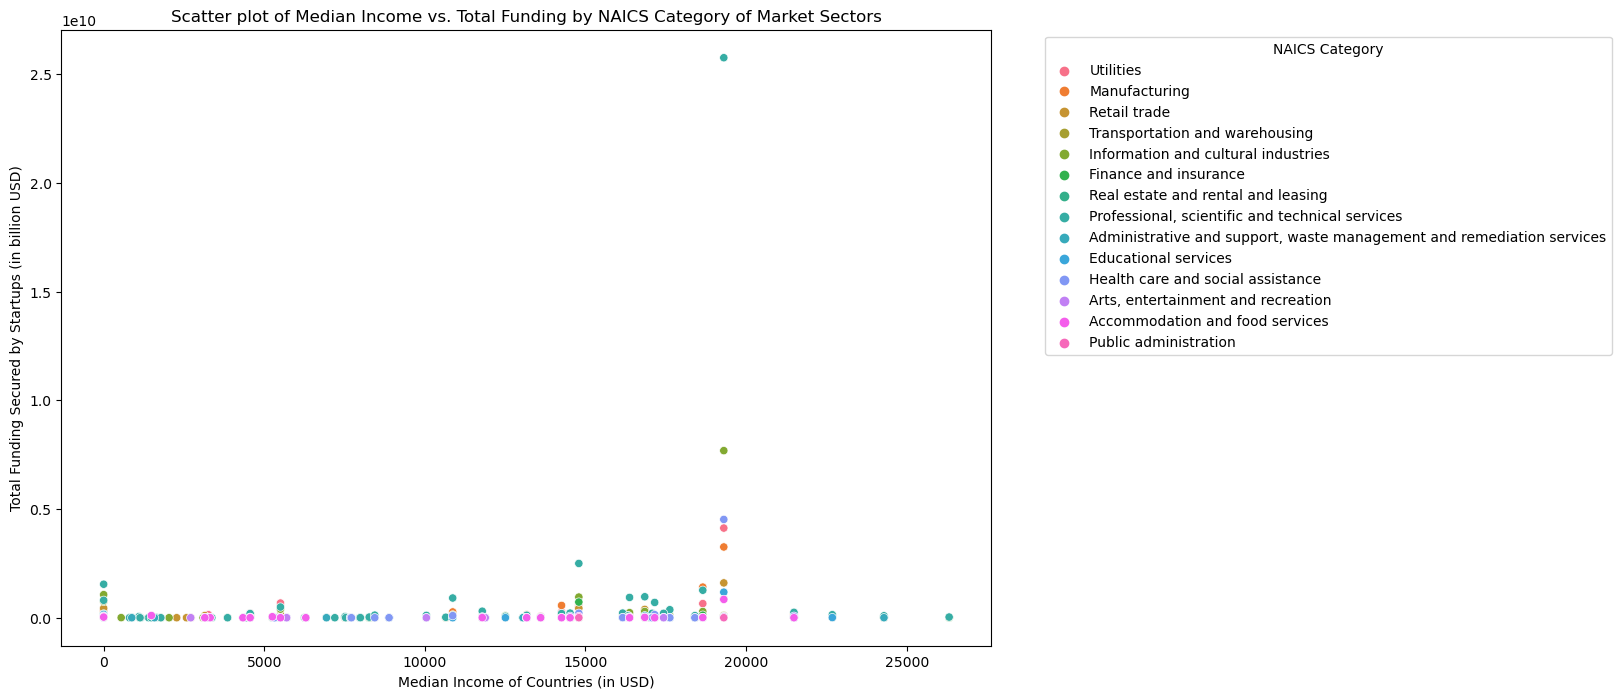

In [53]:
# Scatter plot of median income vs. total funding by aggregated market sector based on NAICS codes
# Define a dictionary mapping market sectors to their corresponding NAICS codes
sector_to_naics = {
    'advertising': '54','analytics': '54','automotive': '44-45','biotech': '54','cleantech': '22','consulting': '54',
    'design': '54','ecommerce': '44-45','education': '61','enterprise': '54','fashion': '44-45','finance': '52',
    'games_video': '51','government': '91','hardware': '31-33','health': '62','hospitality': '72','legal': '54',
    'local': '54','manufacturing': '31-33','medical': '62','messaging': '51','mobile': '51','music': '51',
    'nanotech': '54','network_hosting': '51','news': '51','nonprofit': '54','other': '54','pets': '54','photo_video': '51',
    'public_relations': '54','real_estate': '53','search': '51','security': '54','semiconductor': '31-33','social': '54',
    'software': '54','sports': '71','transportation': '48-49','travel': '56','web': '54'}

# Map market sectors to NAICS categories
merge['naics'] = merge['market sector'].map(sector_to_naics)

# Aggregate data by NAICS category and country, summing the total amount of funding
agg_data = merge.groupby(['naics', 'country']).agg({'total amount of funding (USD)': 'sum', 'medianIncome': 'first'}).reset_index()

# Create dictionary mapping NAICS codes to full industry names
naics_to_industry = {
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31-33': 'Manufacturing',
    '41': 'Wholesale trade',
    '44-45': 'Retail trade',
    '48-49': 'Transportation and warehousing',
    '51': 'Information and cultural industries',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support, waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '91': 'Public administration'}

# Map NAICS codes to full industry names
agg_data['industry'] = agg_data['naics'].map(naics_to_industry)

# Sort the 'agg_data' DataFrame by the 'naics' column
agg_data = agg_data.sort_values(by='naics')

# Create a scatter plot with medianIncome on the x-axis and total_funding on the y-axis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=agg_data, x='medianIncome', y='total amount of funding (USD)', hue='industry')

# Set plot title, labels, and legend
plt.title('Scatter plot of Median Income vs. Total Funding by NAICS Category of Market Sectors')
plt.xlabel('Median Income of Countries (in USD)')
plt.ylabel('Total Funding Secured by Startups (in billion USD)')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

The scatter plot above shows the relationship between median income of countries (in USD) and the total funding secured by startups (in billion USD), with the data points representing different market sectors within countries. Different colors are used to indicate different market sectors based on NACIS categories. This visualization can help identify any potential trends or patterns between median income, total funding, and market sectors, allowing us to analyze whether startups in certain sectors perform better in countries with higher median incomes.

Based on the scatter plot, certain industry trends can be observed. Startups in the manufacturing sector tend to secure higher amounts of funding across countries with various levels of median income, ranging from 4000 USD to 22,000 USD. This might be due to the capital-intensive nature of the manufacturing industry, which often requires substantial investments in equipment, technology and infrastructure. The startups securing the lowest amount of funding across countries and all levels of median income are generally from the public administration sector and accommodation and food services sector. Public administration startups may receive less funding due to their association with government organizations, which often have separate funding mechanisms. The accomodation and food services sector, on the other hand, might face lower funding level possibly due to it's less technology-driven and has a lower growth potential compared to other sectors. 

In countries with high levels of median income, ranging from approximately 23,000 USD to 27,000 USD, startups that are able to secure funding are primarily from the real estate and rental and leasing sector, the professional, scientific and technical services sector, and the administrative and support sector. However, they don't necessarily secure a high amount of funding. Instead, the total funding secured is quite low. A possible reason for this observation might be due to that countries countries with higher median income levels have a more mature and competitive market, which makes it hard for startups in these sectors to attract significant funding. Also, investors in these countries may be more risk-averse, thus prefer investing in startups that have already demonstrated success. This could limit the amount of funding available to newer companies in these sectors.

Clusters of data points can be seen in the range of approximately 1000 USD to 3000 USD and 16,000 USD to 18,000 USD. The groups of data points in the range of 1000 USD to 3000 USD are generally in greenish color, indicating that the finance and insurance sector, the real estate and rental and leasing sector, the professional, scientific and technical services sector, and the administrative and support sector are more prevalent in countries with similar median incomes in this range. This might be because these sectors tend to have lower barriers to entry and can thrive in countries with relatively lower median incomes. Whereas the groups of data points in the range of 16,000 USD to 18,000 USD show various colors, indicating that more sectors are prevalent and successful in countries with similar median incomes in that range. This could be due to countries with higher median incomes having more diverse and developed economies, allowing a wider range of industries to flourish. There is no tendency for certain industries to have similar funding patterns in this income range. This might suggest that the success of startups in these sectors is more dependent on factors other than median income, such as the level of innovation, competitiveness, and local market conditions.

In terms of correlation, a positive correlation can be seen in the range from 0-19,000 USD. This indicates that as median income increases to approximately 19,000 USD, the total funding secured by startups in a given sector also increases. This could be because countries with higher median incomes often have more developed economies and better access to capital, making it easier for startups to secure funding. Whereas for the section where median income of countries is greater than 19,000 USD, a negative correlation is seen. This might be due to the fact that in countries with very high median incomes, the market is more competitive, and investors might be more selective in their investments. This could result in lower funding levels for startups in some sectors.

Regarding outliers, there is one significant data point, a country with a median income of around 19,000 USD and in the healthcare and social assistance industry, standing out from the overall pattern. This country, which is the USA, has attracted a significant amount of funding for healthcare startups compared to other countries with similar median income levels. This pattern may be the result of favorable government policies, tax incentives, or grants that encourage investment in the healthcare sector. The incentives could make it more attractive for startups to seek funding and for investors to contribute. The result may also be due to hubs for healthcare research and innovation within the country. Such an environment can foster the development of cutting-edge healthcare startups that attract significant funding.

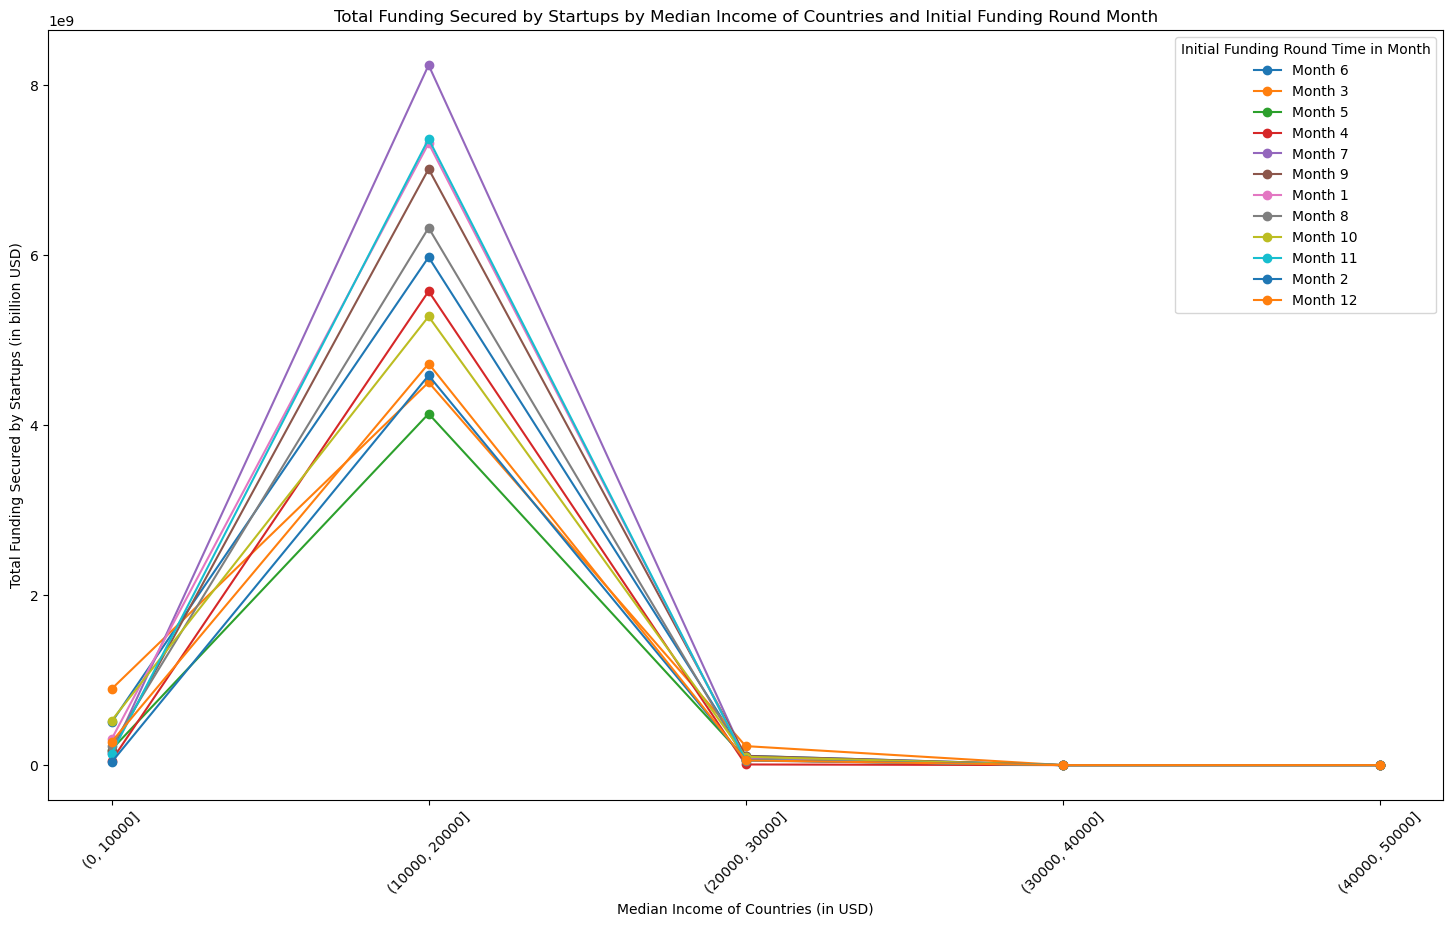

In [54]:
# Line plot of the relationship between he median income of countries and the total funding secured by startups 
# for each initial funding round time by month
plt.figure(figsize=(18, 10))

for month in merge['month'].unique():
    df_month = merge[merge['month'] == month]
    df_grouped = df_month.groupby(pd.cut(df_month['medianIncome'], bins=[0, 10000, 20000, 30000, 40000, 50000]))['total amount of funding (USD)'].sum()
    plt.plot(df_grouped.index.astype(str), df_grouped.values, marker='o', label=f'Month {month}')

plt.xlabel('Median Income of Countries (in USD)')
plt.ylabel('Total Funding Secured by Startups (in billion USD)')
plt.title('Total Funding Secured by Startups by Median Income of Countries and Initial Funding Round Month')
plt.legend(title='Initial Funding Round Time in Month')
plt.xticks(rotation=45)
plt.show()

The above line plot shows the relationship between he median income of countries and the total funding secured by startups for each initial funding round time in month.

There is an increase in the total funding secured by startups as the median income of countries increases. This trend can be observed across all the initial funding round months. This may be due to the fact that countries with higher median incomes typically have more developed economies, better access to capital, and a higher demand for goods and services, making it easier for startups to secure funding. This holds true, regardless of the time of the initial funding round.

The total funding secured by startups in countries with lower median incomes (0-10,000 USD) tends to be relatively lower for all initial funding round months. This may be due to limited access to capital, less developed economies, and a lower demand for goods and services in these countries.

The total funding secured by startups in countries with median incomes between 10,000 and 20,000 USD appears to be more variable across different initial funding round months. This could indicate that there is a greater diversity of startups securing funding in these countries, and that the success of these startups may be more dependent on factors other than median income, such as the level of innovation, competitiveness, and local market conditions.

The total funding secured by startups in countries with higher median incomes (20,000-50,000 USD) shows a relatively consistent pattern across different initial funding round months, with a general increase in funding as the median income increases. This could suggest that startups in these countries are more successful in securing funding due to the more developed economies, better access to capital, and a higher demand for goods and services.

Overall, the line plot does not show a strong correlation between initial funding round month and total funding secured by startups across different median income ranges. This suggests that the time of the initial funding round may not be a significant factor in determining the success of startups in securing funding.

# Final Project

## 4.1 OLS Regression

The economic relationship between the dependent variable (Y), the total amount of funding that startups secure, and the independent variables (X), initial funding round time, market sector, and geographic location of startups, are likely non-linear.

1) Initial funding round time:

Startups securing funding quickly may be perceived as more appealing to investors due to their market potential, resulting in increased investment. However, such effect may diminish over time as a startups matures and the growth potential becomes clearer. This will result in a non-linear relationship. Additionally, based on the data, it was observed that startups January has the greatest number of fundings, significantly exceeding the rest of the months. Whereas the total amount of funding secured in January was not the highest, which was instead July. This suggests that there might be other factors at play, such as market trends or seasonal patterns, influencing the amount of funding secured by startups. Furthermore, this implies a non-linear relationship between initial funding round time and total funding secured.

2) Market sector:

Different sectors may have varying levels of growth potential, risk, and investor interest. For example, technology startups may receive more funding than traditional manufacturing businesses due to their potential for rapid growth, as supported by the data above. Additionally, market trends and sector performance may also impact this relationship, causing it to fluctuate over time. This suggests a non-linear relationship between market sector and total funding secured, as changes in investor sentiment and economic conditions may affect investment patterns across various sectors.

3) Geographic location:

Startups located in regions with strong innovation ecosystems, such as Silicon Valley, may have better access to resources, networking opportunities, and investors, which can lead to higher funding. In the data, startups from countries with well-established startup ecosystems, such as the US, secure higher amount of funding compared to those from countries with less developed ecosystems. However, other factors, such as regional economic conditions, competition, and regulatory environments, can also impact the relationship, making it more complex and potentially non-linear. For instance, startups from countries with lower median incomes, but favorable regulations, incentives, or prevalent and fast-developing industries, might still attract significant funding, as observed in some instances in the data.

The independent variables included in the regressions is chosen based on existing theories that suggest their potential impact on the dependent variable. The Xs from the research question, initial funding round time, market sector and geographic location, are chosen, since  they have been shown in previous research and economic theories to have a significant influence on the amount of funding startups secure. Moreover, the additional variables introduced in relation to the research question, the accelerator presence and median income of countries,  should also be included in the regressions, as they might offer valuable insights into the funding landscape, which may affect the dependent variable as well.

The accelerator presence can be an important factor in attracting funding for startups, as these programs can improve a startup's chances of securing investment. Including this variable in the regression analysis can help determine whether accelerator presence has a significant impact on the total funding secured by startups.

On the other hand, median income of countries can provide insights into the economic conditions and purchasing power of a region, which may influence investor interest in startups from these areas. Higher median incomes could indicate a stronger consumer base and a more favorable environment for business growth, potentially attracting more investment. Including this variable in the regression analysis can also help determine whether the median income of countries has a significant impact on the total funding secured by startups.

By including these additional variables in the regression analysis, a more comprehensive understanding of the factors that influence the amount of funding startups secure can be gained, thus improving the explanatory power of the models.

In [85]:
%%capture
!pip install statsmodels
!pip install linearmodels

In [56]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [57]:
# Getting a unique list of countries
unique_countries = df_new['country'].unique()
unique_countries_list = list(unique_countries)
# Mapping each country to the respective continent
country_to_continent = {
    'GBR': 'Europe', 'USA': 'North America', 'ISR': 'Asia', 'FRA': 'Europe', 'NLD': 'Europe', 'CHE': 'Europe', 'SWE': 'Europe', 
    'FIN': 'Europe', 'CAN': 'North America', 'DNK': 'Europe', 'IRL': 'Europe', 'AUS': 'Oceania', 'IND': 'Asia', 'ARG': 'South America', 
    'GIN': 'Africa', 'CHN': 'Asia', 'PRT': 'Europe', 'RUS': 'Europe', 'ESP': 'Europe', 'DEU': 'Europe', 'ZAF': 'Africa', 'BRA': 'South America', 
    'BEL': 'Europe', 'AUT': 'Europe', 'JPN': 'Asia', 'SAU': 'Asia', 'SGP': 'Asia', 'POL': 'Europe', 'ITA': 'Europe', 'MKD': 'Europe', 
    'LBN': 'Asia', 'MYS': 'Asia', 'BGD': 'Asia', 'KOR': 'Asia', 'LTU': 'Europe', 'PAK': 'Asia', 'NOR': 'Europe', 'TWN': 'Asia', 'SVN': 'Europe', 
    'HUN': 'Europe', 'LVA': 'Europe', 'NZL': 'Oceania', 'MEX': 'North America', 'ARE': 'Asia', 'CZE': 'Europe', 'CYP': 'Asia', 'FST': 'Europe', 
    'COL': 'South America', 'CYM': 'North America', 'ANT': 'North America', 'JOR': 'Asia', 'THA': 'Asia', 'ROM': 'Europe', 
    'BMU': 'North America', 'HKG': 'Asia', 'EST': 'Europe', 'CHL': 'South America', 'GRC': 'Europe', 'URY': 'South America', 'MCO': 'Europe', 
    'EGY': 'Africa', 'UGA': 'Africa', 'LUX': 'Europe', 'TUR': 'Europe', 'SVK': 'Europe', 'PHL': 'Asia', 'TUN': 'Africa', 'GHA': 'Africa', 
    'NGA': 'Africa', 'BGR': 'Europe', 'KEN': 'Africa', 'MLT': 'Europe', 'CSS': 'Europe', 'UKR': 'Europe', 'ISL': 'Europe', 'VNM': 'Asia', 
    'SLV': 'North America', 'HRV': 'Europe', 'NPL': 'Asia', 'IDN': 'Asia', 'GEO': 'Asia', 'ZMB': 'Africa', 'PAN': 'North America', 
    'PST': 'Europe', 'GTM': 'North America', 'ALB': 'Europe', 'PRY': 'South America', 'VEN': 'South America', 'MAR': 'Africa', 'SMR': 'Europe', 
    'BHS': 'North America', 'AZE': 'Asia', 'CRI': 'North America', 'BHR': 'Asia', 'SWZ': 'Africa', 'HMI': 'North America'}
# Create a new 'continent' column by mapping the 'country' column using the continent_mapping dictionary
merge['continent'] = merge['country'].map(country_to_continent)

In [58]:
sector_to_naics = {
    'advertising': '54','analytics': '54','automotive': '44-45','biotech': '54','cleantech': '22','consulting': '54',
    'design': '54','ecommerce': '44-45','education': '61','enterprise': '54','fashion': '44-45','finance': '52',
    'games_video': '51','government': '91','hardware': '31-33','health': '62','hospitality': '72','legal': '54',
    'local': '54','manufacturing': '31-33','medical': '62','messaging': '51','mobile': '51','music': '51',
    'nanotech': '54','network_hosting': '51','news': '51','nonprofit': '54','other': '54','pets': '54','photo_video': '51',
    'public_relations': '54','real_estate': '53','search': '51','security': '54','semiconductor': '31-33','social': '54',
    'software': '54','sports': '71','transportation': '48-49','travel': '56','web': '54'}

# Mapping the market sectors to their corresponding NAICS codes
merge['naics'] = merge['market sector'].map(sector_to_naics)

# Create dictionary mapping NAICS codes to full industry names
naics_to_industry = {
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31-33': 'Manufacturing',
    '41': 'Wholesale trade',
    '44-45': 'Retail trade',
    '48-49': 'Transportation and warehousing',
    '51': 'Information and cultural industries',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support, waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '91': 'Public administration'}

# Mapping the NAICS codes to their industry names
merge['industry'] = merge['naics'].map(naics_to_industry)

In [59]:
# Creating a dataframe with number of accelerators in each country and merge with main dataframe
# Group by city and count the unique accelerators
city_accelerator_count = merged_df.groupby(['country', 'city'])['Program'].nunique().reset_index()
city_accelerator_count.columns = ['country', 'city', 'num_accelerators']

# Group by country and sum the number of accelerators
country_accelerator_count = city_accelerator_count.groupby('country')['num_accelerators'].sum().reset_index()

# Merge the country_accelerator_count DataFrame with the main DataFrame
regression_data = merge.merge(country_accelerator_count[['country', 'num_accelerators']], on='country', how='left')

In [60]:
# Creating dummy variables for continent and industry
continent_dummies = pd.get_dummies(merge['continent'], prefix='continent', drop_first=True)
industry_dummies = pd.get_dummies(merge['industry'], prefix='industry', drop_first=True)

# Concatenate the continent and industry dummy variables to the main dataframe
regression_data = pd.concat([regression_data, continent_dummies, industry_dummies], axis=1)

In [61]:
regression_data

funded object id      city country  total amount of funding (USD)  \
0                 c:26    London     GBR                     13200000.0   
1                 c:83    Oxford     GBR                            0.0   
2                c:132    London     GBR                      5000000.0   
3                c:162    London     GBR                      5000000.0   
4                c:229    London     GBR                      5000000.0   
...                ...       ...     ...                            ...   
11339         c:258141      Baku     AZE                       100000.0   
11340         c:262330      Baku     AZE                       200000.0   
11341         c:267396  San José     CRI                        40000.0   
11342         c:272393  Lausanne     SWZ                     40000000.0   
11343         c:275592   Liestal     SWZ                     11141000.0   

      entity type market sector     status first funding at name  month  ...  \
0         Company   games_video     closed       2005-06-01  NaN      6  ...   
1         Company           web     closed       2006-03-01  NaN      3  ...   
2         Company         music   acquired       2006-05-01  NaN      5  ...   
3         Company           web  operating       2006-04-01  NaN      4  ...   
4         Company     ecommerce   acquired       2005-07-01  NaN      7  ...   
...           ...           ...        ...              ...  ...    ...  ...   
11339     Company   advertising  operating       2013-03-15  NaN      3  ...   
11340     Company         other  operating       2013-09-06  NaN      9  ...   
11341     Company      software  operating       2013-11-25  NaN     11  ...   
11342     Company       biotech  operating       2013-10-16  NaN     10  ...   
11343     Company       biotech  operating       2013-10-30  NaN     10  ...   

       industry_Finance and insurance  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
11339                               0   
11340                               0   
11341                               0   
11342                               0   
11343                               0   

       industry_Health care and social assistance  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
11339                                           0   
11340                                           0   
11341                                           0   
11342                                           0   
11343                                           0   

       industry_Information and cultural industries  industry_Manufacturing  \
0                                                 1                       0   
1                                                 0                       0   
2                                                 1                       0   
3                                                 0                       0   
4                                                 0                       0   
...                                             ...                     ...   
11339                                             0                       0   
11340                                             0                       0   
11341                                             0                       0   
11342                                             0                       0   
11343                                             0                       0   

       industry_Professional, scientific and technical services  

In [62]:
regression_data.to_csv('regression.csv', index=False)

Below are regressions that I chose to run to systematically explore the relationship between the total amount of funding a startup can secure and various independent variables (geographic location, market sector, month of the initial funding round, number of accelerators, and median income of countries). 

In [86]:
# Regression 1: 
# Dependent variable: total amount of funding (USD), Independent variables: continent dummy variables

# Identify the columns for continent dummy variables
continent_columns = [col for col in regression_data.columns if 'continent_' in col]

# Add a constant term to the dataset
regression_data['const'] = 1

# Define the independent variable list for regression 1
X1 = ['const'] + continent_columns

# Estimate an OLS regression for regression 1
reg1 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X1], missing='drop').fit()

# Display the results
#print(reg1.summary())

This regression aims to determine if the total amount of funding a startup can secure varies by geographic location. Different continents may have varying levels of economic development, investor preferences, market sizes, and regulations, which can influence the funding landscape.

In [87]:
# Regression 2: 
# Dependent variable: total amount of funding (USD), Independent variables: industry dummy variables

# Identify the columns for industry dummy variables
industry_columns = [col for col in regression_data.columns if 'industry_' in col]

# Add a constant term to the dataset
regression_data['const'] = 1

# Define the independent variable list for regression 2
X2 = ['const'] + industry_columns

# Estimate an OLS regression for regression 1
reg2 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X2], missing='drop').fit()

# Display the results
#print(reg2.summary())

This regression investigates if the industry sector of a startup affects the total amount of funding it can secure. Certain industries may be more attractive to investors due to their growth potential, market trends, or technological advancements.

In [88]:
# Regression 3:
# Dependent variable: total amount of funding (USD), Independent variables: continent dummy variables + month
# Identify the columns for continent dummy variables
continent_columns = [col for col in regression_data.columns if 'continent_' in col]

# Add a constant term to the dataset
regression_data['const'] = 1

# Define the independent variable list for regression 3
X3 = ['const'] + continent_columns + ['month']

# Estimate an OLS regression for regression 3
reg3 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X3], missing='drop').fit()

# Display the results
#print(reg3.summary())

This regression examines the combined effect of the geographic location and the month of the initial funding round on the total amount of funding. The timing of funding rounds may be influenced by economic cycles, seasonality, or investor sentiment, which could also vary across continents.

In [89]:
# Regression 4: 
# Dependent variable: total amount of funding (USD), Independent variables: industry dummy variables + month

# Identify the columns for industry dummy variables
industry_columns = [col for col in regression_data.columns if 'industry_' in col]

# Add a constant term to the dataset
regression_data['const'] = 1

# Define the independent variable list for regression 4
X4 = ['const'] + industry_columns + ['month']

# Estimate an OLS regression for regression 1
reg4 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X4], missing='drop').fit()

# Display the results
#print(reg4.summary())

This regression evaluates the combined impact of the industry sector and the month of the initial funding round on the total amount of funding. Different industries might experience different seasonal patterns or respond differently to economic cycles.

In [90]:
# Regression 5
# Dependent variable: total amount of funding (USD), Independent variables: continent dummy variables + accelerators
X5 = ['const'] + continent_columns + ['num_accelerators']
reg5 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X5], missing='drop').fit()
#print(reg5.summary())

This regression explores the effect of the geographic location and the number of accelerators in each country on the total amount of funding. Accelerators can provide startups with resources, connections, and mentoring, which may influence funding opportunities.

In [91]:
# Regression 6
# Dependent variable: total amount of funding (USD), Independent variables: continent dummy variables + median income
X6 = ['const'] + continent_columns + ['medianIncome']
reg6 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X6], missing='drop').fit()
#print(reg6.summary())

This regression aims to determine the relationship between the geographic location, median income of countries, and the total amount of funding a startup can secure. Higher median income levels may indicate a more developed economy, which could affect investor preferences and the funding landscape.

In [92]:
# Regression 7
# Dependent variable: total amount of funding (USD), Independent variables: industry dummy variables + accelerators
X7 = ['const'] + industry_columns + ['num_accelerators']
reg7 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X7], missing='drop').fit()
#print(reg7.summary())

This regression investigates the combined effect of the industry sector and the number of accelerators in each country on the total amount of funding. The availability and impact of accelerators might differ across industries.

In [93]:
# Regression 8
# Dependent variable: total amount of funding (USD), Independent variables: industry dummy variables + median income
X8 = ['const'] + industry_columns + ['medianIncome']
reg8 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X8], missing='drop').fit()
#print(reg8.summary())

This regression examines the combined influence of the industry sector and the median income of countries on the total amount of funding. Industries may have different growth potentials and funding opportunities in countries with varying income levels.

In [94]:
# Regression 9
# Dependent variable: total amount of funding (USD), Independent variables: continent and industry dummy variables + month 
X9 = ['const'] + continent_columns + industry_columns + ['month']
reg9 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X9], missing='drop').fit()
#print(reg9.summary())

This regression evaluates the combined effect of all the independent variables from the research question, which are the major influencing variables on the total amount of funding secured by startups.

In [95]:
# Regression 10
# Dependent variable: total amount of funding (USD), Independent variables: continent and industry dummy variables + month 
# + accelerators + median income
X10 = ['const'] + continent_columns + industry_columns + ['month', 'num_accelerators', 'medianIncome']
reg10 = sm.OLS(regression_data['total amount of funding (USD)'], regression_data[X10], missing='drop').fit()
#print(reg10.summary())

This comprehensive regression evaluates the combined effect of all the independent variables on the total amount of funding a startup can secure. Running this regression helps to determine the relative importance of each factor while controlling for the others, offering a more complete understanding of the funding landscape.

In [96]:
%%capture
!pip install stargazer

In [74]:
from stargazer.stargazer import Stargazer
from IPython.display import  HTML

# Combine the regression results
regressions = [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10]

# Create a Stargazer object
stargazer_table = Stargazer(regressions)

# Set table title
stargazer_table.title('Summary Table of Regression Results')

# Set table column names
stargazer_table.custom_columns(['Reg 1', 'Reg 2', 'Reg 3', 'Reg 4', 'Reg 5', 'Reg 6', 'Reg 7', 'Reg 8', 'Reg 9', 'Reg 10'], 
                               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Set significance level for stars
stargazer_table.significance_levels([0.1, 0.05, 0.01])

HTML(stargazer_table.render_html())

Based on the results of the regression models, R-squared and adjusted R-squared are actually quite low for all the models, indicating that these models may not explain much of the variation in the total amount of funding. The models may not be capturing the full complexity of factors influencing the total amount of funding. The F-statistics and p-values show that some of the models are significant, but with low R-squared values, this significance may be limited. 

Some individual predictors show statistical significance in certain regressions, such as the "month" variable. In Regressions 3 and 4, it has a p-value of 0.023 and 0.033, respectively. This suggests that the timing of the initial funding round may have an impact on funding. The "utilities" industry, when included in the regressions, is also statistically significant. For example, the coefficient for "industry_Utilities" in Regression 10 is 9,226,861.4 (with a standard error of 3,827,629), indicating that startups in the utilities sector receive, on average, 9.23 million USD more in funding compared to the base category (Agriculture, forestry, fishing, and hunting). This result is statistically significant, with a p-value ranging from 0.016 to 0.022 in all the models including it. However, without a more comprehensive model that better explains the variation in the dependent variable, it is difficult to draw strong conclusions based on these results alone.

The continent variables, which represents the geographic location variable in the research question, appear in regression models 1, 3, 6, 7, 9 and 10. The coefficients for these variables indicate the difference in the total amount of funding for startups in these continents compared to the reference group, which in this case is Africa. For example, in regression 10, the coefficient for "continent_Asia" is 5,071,105 (with a standard error of 4,947,450), indicating that on average, startups in Asia receive about 5.07 million USD more in funding than the base category (Africa). However, the p-value of 0.307 suggests that this result is not statistically significant at the 0.05 level. In the results, none of the continent variables are statistically significant in any models. This implies that there is no strong evidence to conclude that the geographic location (continent) of a startup has a significant impact on the total amount of funding it can secure, at least based on the current models.

The number of accelerators is only significant in Regression 7, which may suggest that the presence of accelerators could play a role in securing funding, but this should be interpreted with caution since it's insignificant in other models. 

The median income is not statistically significant in the models it's included in, suggesting it might not be an important determinant of the total amount of funding secured by startups. 

These regression results provide some insights into the factors affecting the total amount of funding for startups, but the low explanatory power of the models suggests that further analysis or alternative modeling techniques might be necessary to provide more conclusive evidence.

Given the low R-squared value, it is possible that the linear regression models are not well-fitted. As a result, a non-linear polynomial regression was run to determine whether the non-linear model would perform better.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values
regression_data.dropna(inplace=True)

# Handle infinite values
regression_data.replace([np.inf, -np.inf], np.nan, inplace=True)
regression_data.dropna(inplace=True)

# Define the features and target variable
X = regression_data[continent_columns + industry_columns + ['month']]
y = regression_data['total amount of funding (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial transformation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R2: {r2_test:.2f}")

Training MSE: 4058105040867035.50, R2: 0.03
Testing MSE: 13804202732054237578775459004416.00, R2: -76976464021459264.00


The above regression is a second-degree polynomial regression. This regression adds polynomial terms of the independent variables to the linear regression model, which may help model non-linear relationships.

The results show that the polynomial regression is actually not performing well, especially on the testing set.The mean squared error (MSE) on the training set is really high, which indicates a poor fit of the model to the training data. The R-square value for the training set is 0.03. This means that the model only explains 3% of the variance in the dependent variable, which is very low and suggests a weak relationship between the independent variables and the dependent variable.

On the other hand, the model is not performing well on unseen data, as indicated by the MSE being even higher on the testing set compared to the training set. The tested R-squared is a negative value, which implies that the model performs extremely poorly on the test data and does not capture the underlying relationship between the independent and the dependent variable.

By trying different degrees of polynomial regression, the performance still doesn't improve. As a result, considering the poor performance of the polynomial model, it might be better to stick with the linear models used earlier. 

Generally, regressions with more relevant independent variables included are preferred as it take into account all possible factors that may affect the dependent variable. However, when multiple independent variables are included in a multiple linear regression model, it's highly likely that the independent variables will be highly correlated with each other. As a result, multicollinearity will occur, making it hard to determine the individual impact of each predictor variable on the dependent variable. This will in turn reduce model performance. On the other hand, since the results above demonstrate that number of accelerators and median income of countries do not have a significant impact on the total amount of funding secured, these variables can be dropped in further regression analysis. 

Consequently, my preferred specification for this analysis is multiple linear regression with all relevant independent variables from the research question included. This would be Regression 9, which includes continent dummy variables, industry dummy variables, and month of the initial funding round.

The reasons for choosing this specification are:

1. By including all relevant independent variables from research question, while dropping insignificant additional variables, this model takes into account the various factors that may influence the total amount of funding a startup can secure. This provides a more complete understanding of the funding landscape and helps to identify the key drivers of funding success.
2. Multiple linear regression is a relatively straightforward and interpretable model that allows us to understand the relationships between the dependent and independent variables. The coefficients of the model can be directly interpreted as the average change in the total amount of funding for a one-unit change in the independent variable, holding other variables constant. Also, comparing the results of linear regression versus polynomial regression on the current dataset shows that linear regression works better on the current dataset.
3. The use of a linear regression model facilitates comparison with other machine learning models, as the interpretation of the results remains consistent across different modeling techniques.

## 4.2 Machine Learning

To minimize the difference between predicted and observed values, or, in other words, to minimize the mean squared error (MSE), an objective function for a regression tree is useful.

### 4.2.1 Objective Function

The objective function for a regression tree using the variables from Regression 9 is as follows:

Minimize $\sum_{i \in \text{dataset}} (y_i - \hat{y}_i)^2$, for all i in the dataset

where,
- ${y}_i$ is the observed total amount of funding for startup i (in USD)
- $\hat{y}_i$ is the predicted total amount of funding for startup (in USD)
- i represents each startup in the dataset

The regression tree starts by recursively splitting the data into regions based on the predictor variables, which in this case, are the initial funding round time, initial funding round time, market sector, geographic location, number of accelerators, and median income in each country. For each region, it calculates the mean total amount of funding ($\hat{y}_i$) for all startups within that region. The regression tree calculates the residual (${y}_i$ - $\hat{y}_i$) for each startup within each region. This represents difference between predicted values and observed values, which is what we expect to minimize. By finding the best split of the data, we can find the way that results in smallest MSE. The process will continue until reaching a pre-defined maximum depth or minimum number of data points within a region. 

Regularization parameters can control the complexity of models and help prevent overfitting. Some common regularization parameters include maximum tree depth, minimum number of observations in each group, tuning parameter a, which is a penalty term for having a larger tree.

Changing regularization parameters can have a significant impact on models and results. Increasing the complexity of a model (e.g., using deeper trees) can improve its fit to the training data, but it may also result in overfitting, causing poor generalization to new, unseen data. Conversely, decreasing model complexity can help prevent overfitting but may lead to an underfit model that fails to capture the underlying relationships in the data. In other words, there's a trade-off between model complexity and quality. Therefore, it's crucial to tune regularization parameters carefully to obtain a well-fitting model that balances between complexity and quality.

### 4.2.2 Regression Tree

In [76]:
from sklearn import tree
from sklearn import metrics

In [77]:
X_columns = continent_columns + industry_columns + ['month']
X = regression_data[X_columns]
y = regression_data['total amount of funding (USD)']

sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X, y)
y_pred_tree = sqft_tree.predict(X)

print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

rmse = np.sqrt(metrics.mean_squared_error(y, y_pred_tree))
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 2920541455194518.5
Root Mean Squared Error: 54042034.15115421


In [78]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred_tree)
print('R-squared:', r2)

R-squared: 0.13363910436628967


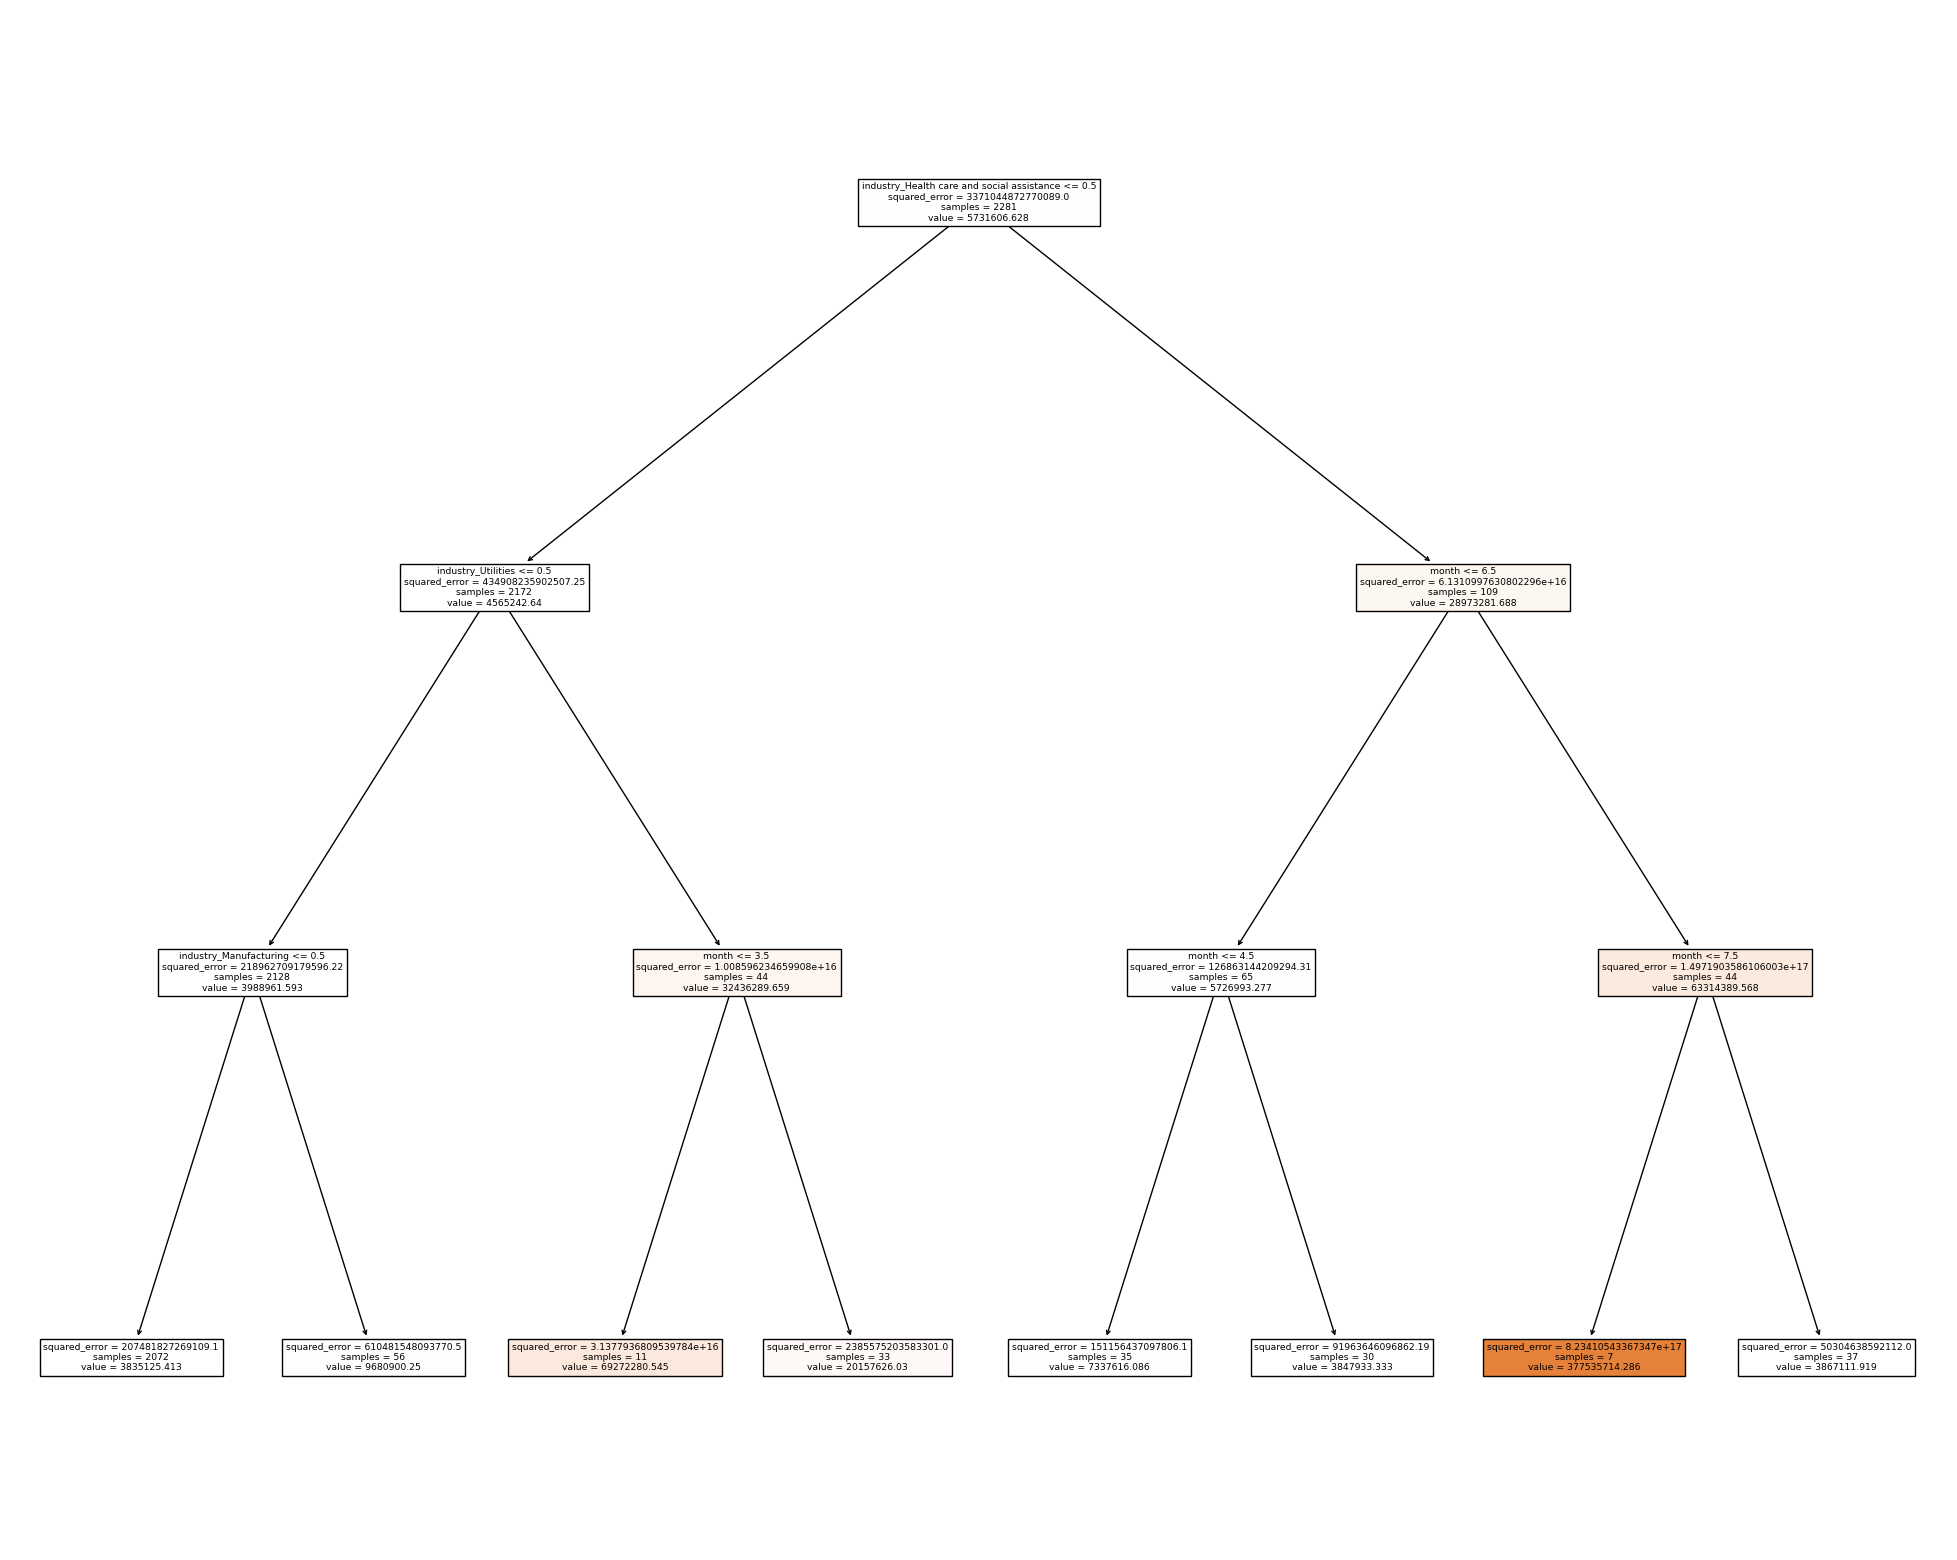

In [79]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

As shown in the result above, the MSE is 2.92 * 10^15. Since the value is hard to interpret on its own, the rooted MSE is also calculated. The RMSE is the average difference between the predicted and actual funding amounts for each startup in the dataset, which also provides an indication of how well the model is performing in terms of prediction accuracy. A RMSE of 54042034 indicates that the regression tree's predictions are about 54 million USD off from the actual funding amounts on average. Since the scale of individual funding amounts in the dataset ranges from 0 to tens of millions of USD, therefore the current RMSE can be considered as very large. This indicates that the regression tree model might not be performing well in predicting the total amount of funding for startups.

R-squared is also used to assess the model's performance. The regression tree results show that R-squared is 0.1336, indicating that the regression tree can explain 13.36% of the variation in the total amount of funding.

After comparing the performance of a regression tree to the chosen OLS regression, it's clear that the latter has a very low R-squared value of only 0.009. This suggests that the model doesn't explain much of the variance in the data. In contrast, the regression tree has an R-squared value of 0.133639. The higher R-squared value for the regression tree suggests that it is better at explaining the variance in the total amount of funding (USD) compared to the OLS model.While still relatively low, it's already a lot higher than the R-squared value of regression 9. In other words, it's a significant improvement over the OLS regression model.

Regression trees and OLS regression models are based on different assumptions. Regression trees aim to minimize mean squared error (MSE), while OLS aims to minimize standard error (SE). They have different strengths and weaknesses. Regression trees can capture non-linear relationships between independent and dependent variables, while OLS only assumes linear relationships, which may not always be the case in real-world data. However, it is important to note that regression is limited due to the trade-off between model complexity and quality. It still cannot fully deal with relationships that are too complex.

## 5. Conclusion

In conclusion, the analysis of startup funding success has provided valuable insights into the complex relationship between geographic location, market sector and initial funding round time from the research question and the additional introduced variables of presence of accelerators and median income of countries. By incorporating OLS regression, regression trees, and visualizations, a more comprehensive understanding of the factors determining startup funding success was achieved.

The analysis of graphical and economic intuitions suggests that the presence of accelerators, the initial funding round time, market sectors, and median income by country and geographic location itself all play significant roles in determining the funding outcomes for startups. However, the findings from the OLS regression and regression tree analysis appear to contradict these conclusions, likely due to the limitations of these statistical techniques in capturing complex relationships and interactions between multiple variables, as evidenced by low R-squared and high p-values in most of the models.

Inconsistencies between the findings from visualizations and the regression models may be due to issues such as multicollinearity, the presence of outliers, or nonlinear relationships between variables. These issues are not well-captured by OLS regression and regression tree models. Additionally, the regression models may not have included all relevant variables or controlled for potential confounders, leading to biased or incomplete results. Potential confounders may include the quality of the management team, market conditions, and product-market fit. None of these factors were taken into consideration in this research. Other limitations of the current research include its reliance on data from a specific time frame, which may not be representative of the current or future startup landscape. The use of aggregated data is also a limitation, as it may not accurately reflect the nuances of each individual startup.

To address these limitations and improve the understanding of factors affecting startup funding, further research could be conducted by using 
more granular data to capture potential existing nuances, such as individual startup financial records or detailed information on the startups' management teams. Further research could also involve the use of more advanced statistical techniques which can better capture complex relationships and interactions among variables. Additionally, incorporating more variables that can influence startup funding, such as government policies, investor preferences, and cultural factors, could help improve the explanatory power of the regression models, and would provide a more comprehensive understanding of the startup funding landscape. Time-seris analysis may also be conducted track the progress of startups over time and analyze the impact of various factors on their success or failure.

Overall, while graphical analysis offer valuable insights into the factors influencing startup funding, the inconsistencies with the regression analysis results highlight the need for further research and more robust statistical techniques to better understand the complex interplay of factors affecting the total funding secured by startups. By addressing these limitations and incorporating additional variables, future research can potentially lead to more accurate and meaningful conclusions, which can inform strategies and policies to support startups in securing funding and achieving success.

## 6. References

Cirtautas, J. (2019, December 2). Startup investments. Kaggle. Retrieved April 16, 2023, from https://www.kaggle.com/datasets/justinas/startup-investments?resource=download&amp;select=investments.csv 

DB: List of individual seed accelerator programs. Seed. (n.d.). Retrieved April 16, 2023, from https://www.seed-db.com/accelerators 

Gompers, P., Kovner, A., Lerner, J., &amp; Scharfstein, D. (2008). Venture Capital Investment Cycles: The impact of public markets. Journal of Financial Economics, 87(1), 1–23. https://doi.org/10.1016/j.jfineco.2006.12.002 

Government of Canada, S. C. (2021, March 18). North American Industry Classification System (NAICS) Canada 2017 version 3.0. NAICS 2017 Version 3.0 - 54 - Professional, scientific and technical services - Sector. Retrieved April 3, 2023, from https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1181553&CVD=1181554&CPV=54&CST=01012017&CLV=1&MLV=5 

HOCHBERG, Y. A. E. L. V., LJUNGQVIST, A. L. E. X. A. N. D. E. R., &amp; LU, Y. A. N. G. (2007). Whom you know matters: Venture Capital Networks and Investment Performance. The Journal of Finance, 62(1), 251–301. https://doi.org/10.1111/j.1540-6261.2007.01207.x 

PURI, M. A. N. J. U., &amp; ZARUTSKIE, R. E. B. E. C. C. A. (2012). On the life cycle dynamics of Venture-capital- and non-venture-capital-financed firms. The Journal of Finance, 67(6), 2247–2293. https://doi.org/10.1111/j.1540-6261.2012.01786.x 